<a href="https://colab.research.google.com/github/AdityaKalkeri/DataTrained-Projects/blob/master/Project_20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("dark")

In [3]:
from google.colab import files
upload1 = files.upload()

Saving 01_District_wise_crimes_committed_IPC_2001_2012.csv to 01_District_wise_crimes_committed_IPC_2001_2012.csv


# Yearly Crime Data

In [4]:
import io
district_df = pd.read_csv(io.BytesIO(upload1["01_District_wise_crimes_committed_IPC_2001_2012.csv"]))
district_df.head()

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,DACOITY,PREPARATION AND ASSEMBLY FOR DACOITY,ROBBERY,BURGLARY,THEFT,AUTO THEFT,OTHER THEFT,RIOTS,CRIMINAL BREACH OF TRUST,CHEATING,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,30,16,9,0,41,198,199,22,177,78,16,104,1,30,1131,16,149,34,175,0,181,1518,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,30,23,8,0,16,191,366,57,309,168,11,65,8,69,1543,7,118,24,154,0,270,754,4125
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,34,25,4,0,14,237,723,164,559,156,33,209,9,38,2088,14,112,83,186,0,404,1262,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,20,5,1,0,4,98,173,36,137,164,12,37,2,23,795,17,126,38,57,0,233,1181,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,26,23,4,0,25,437,1021,150,871,70,50,220,3,41,1244,12,109,58,247,0,431,2313,6507


**This dataset contains districtwise data about various crimes commited in India**

In [5]:
district_df.shape

(9017, 33)

In [6]:
district_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9017 entries, 0 to 9016
Data columns (total 33 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   STATE/UT                                             9017 non-null   object
 1   DISTRICT                                             9017 non-null   object
 2   YEAR                                                 9017 non-null   int64 
 3   MURDER                                               9017 non-null   int64 
 4   ATTEMPT TO MURDER                                    9017 non-null   int64 
 5   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER            9017 non-null   int64 
 6   RAPE                                                 9017 non-null   int64 
 7   CUSTODIAL RAPE                                       9017 non-null   int64 
 8   OTHER RAPE                                           9017 non-null   int64 
 9

No Null values present in the dataset

Lets do some general analysis

## Analysis

In [7]:
yearly = district_df.groupby("YEAR").agg(np.sum).reset_index()
yearly

,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,DACOITY,PREPARATION AND ASSEMBLY FOR DACOITY,ROBBERY,BURGLARY,THEFT,AUTO THEFT,OTHER THEFT,RIOTS,CRIMINAL BREACH OF TRUST,CHEATING,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,2001,72404,63046,6734,32150,0,32150,44974,29290,15684,12308,3228,39802,202364,505606,127426,378180,152444,29596,89454,3366,21068,542974,13702,68248,19492,98340,228,114364,1402724,3538616
1,2002,70580,60760,7248,32746,6,32740,43700,29012,14688,12202,3682,37528,192922,494924,133336,361588,137890,28054,92542,3044,23640,530050,13644,67886,20310,98474,152,128088,1460594,3560660
2,2003,65432,51884,8058,31694,2,31692,39984,26592,13392,10606,4604,35024,185654,490474,138614,351860,114668,26864,94956,4110,18730,522888,12416,65878,24650,101406,92,121344,1400824,3432240
3,2004,67216,55780,7870,36466,4,36462,46654,31156,15498,10622,4680,36916,184980,546090,161364,384726,119942,28352,103878,3058,17274,553736,14052,69134,20002,116242,178,138846,1482052,3664020
4,2005,65438,56062,7156,36718,14,36704,45664,31500,14164,10282,5668,35346,180216,546222,171418,374804,112470,27144,107250,4766,16902,541722,13574,68350,19968,116638,298,143396,1483954,3645204
5,2006,64962,54460,7070,38696,4,38692,47982,34828,13154,9494,6258,36912,183332,548708,181902,366806,113282,27272,116152,4338,16960,529496,15236,73234,19932,126256,134,157026,1559394,3756586
6,2007,64636,54802,7288,41474,2,41472,55122,40832,14290,9158,6410,38272,182436,570086,200510,369576,119830,31062,130652,4408,18048,546134,16186,77468,21900,151860,122,173580,1658412,3979346
7,2008,65532,57196,7726,42934,0,42934,60522,45878,14644,9060,6434,41044,187484,633522,240064,393458,132036,32974,133158,5982,18498,569938,16344,80826,24428,162688,134,184372,1713926,4186758
8,2009,64738,58076,7860,42794,4,42790,67720,51482,16238,9172,5700,44818,184140,648390,280054,368336,125884,32652,145436,5870,17472,558428,16766,77422,22018,179092,96,197064,1731082,4242690
9,2010,66670,58842,7564,44344,12,44332,76880,59590,17290,8716,5230,46786,180358,660624,294950,365674,135142,33356,157998,5178,17016,578044,16782,81226,19922,188082,72,212686,1848144,4449662


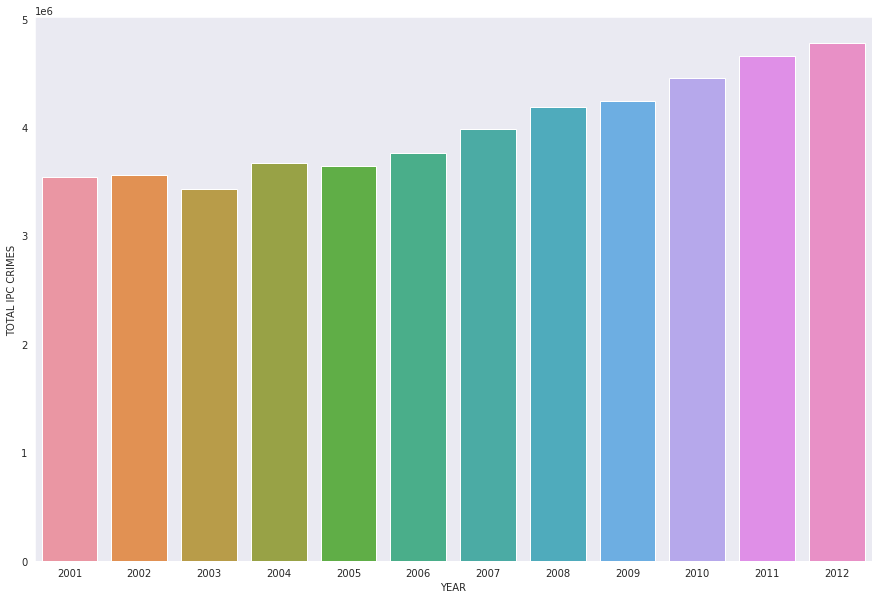

In [8]:
plt.figure().set_size_inches(15,10)
sns.barplot(x = "YEAR", y="TOTAL IPC CRIMES", data = yearly, ci = None)

**Crime rate has been increasing every year since 2005**

**It was lowest in 2003 with 3432240 cases**

**In 2012, the total cases were 4774376**

**These are only IPC cases, state cases are different**

(Maybe we can do time analysis to predict the crime rate in 2020 or even 2050?)

In [9]:
def ipc_plot(crime1, crime2):
  plt.figure().set_size_inches(20,10)
  plt.subplot(1,2,1)
  sns.barplot(x = "YEAR", y=crime1 , data = yearly, ci = None)
  plt.title(crime1)
  plt.subplot(1,2,2)
  sns.barplot(x = "YEAR", y = crime2, data = yearly, ci = None)
  plt.title(crime2)

### Murders

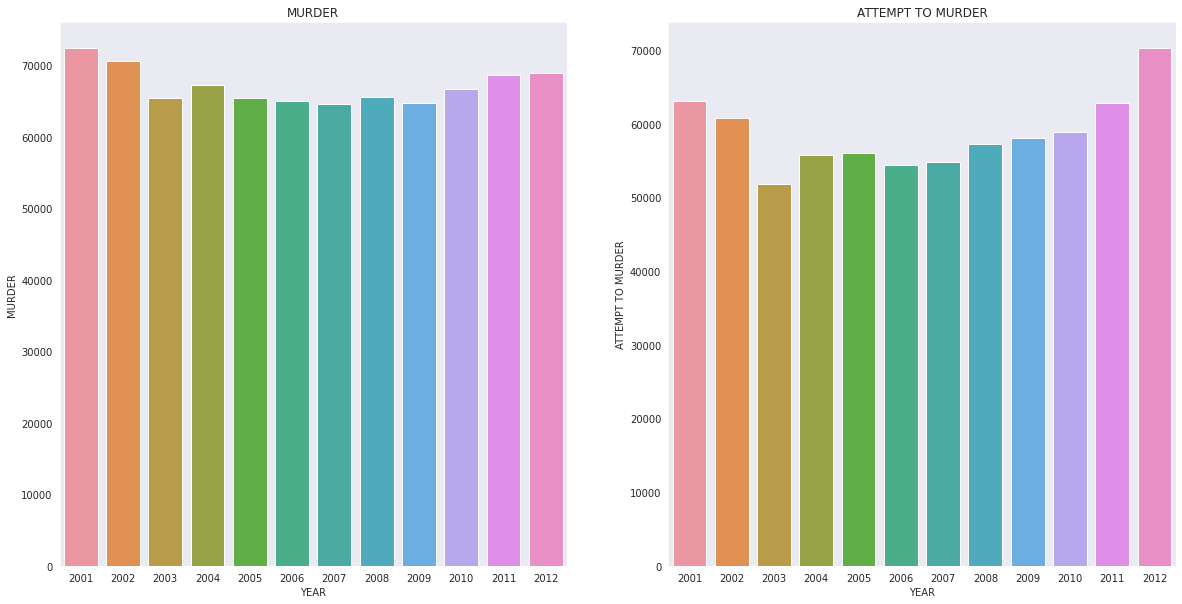

In [10]:
ipc_plot("MURDER", "ATTEMPT TO MURDER")

**While murder cases have reduced, but attempt to murder cases have increased.**

**So we cannot conclude that murders have reduceds, maybe criminals have been less successful to fully carry out murder**

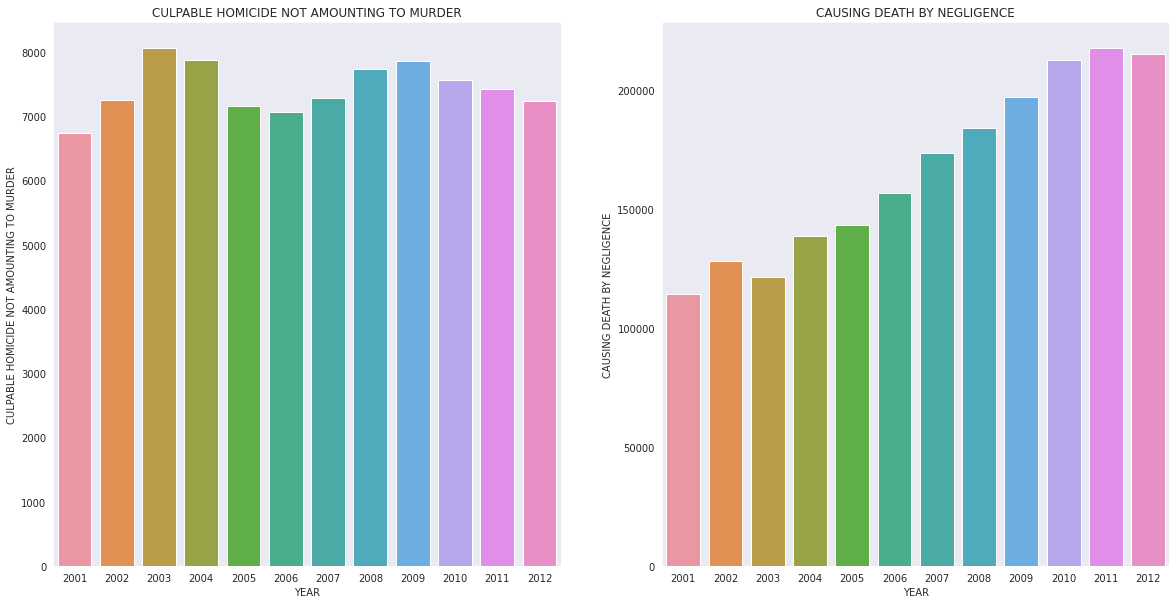

In [11]:
ipc_plot("CULPABLE HOMICIDE NOT AMOUNTING TO MURDER", "CAUSING DEATH BY NEGLIGENCE")

Difference between Culpable Homicide and Murder:

The difference between murder and culpable homicide is intention. If the intention is present the crime is said to be committed under Section 300 of IPC (Murder). If the intention is absent, then the crime is dealt under section 304 of IPC(Culpable Homicide).
There is no clear trend, as the cases of Culpable Homicide fluctuates between 60,000 and 80,000

Causing death by negligence:

Whoever causes the death of any person by doing any rash or negligent act not amounting to culpable homicide.

There has been a tremendous increase in causing death by negligence.



### Riots and arson

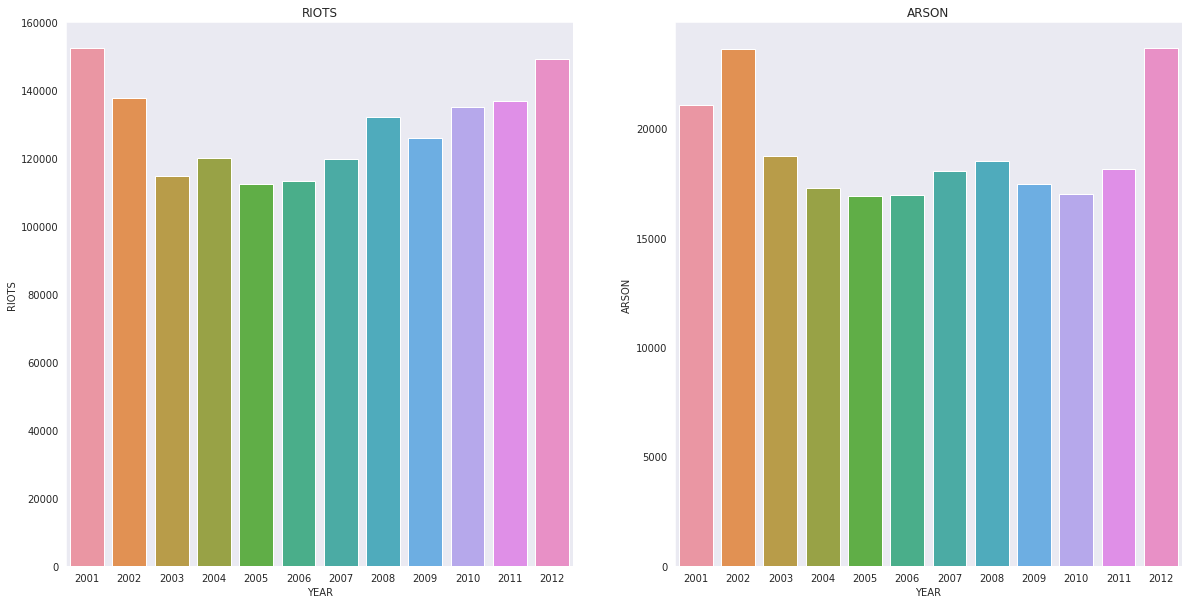

In [12]:
ipc_plot("RIOTS", "ARSON")

There have been a tremendous amounts of Riots cases in India

2001 and 2002 were the years when Ayodhya Ram Mandir issues were occuring, numerous Riots had rocked the country.

The riots seem to decrease till 2000, where they started to increase once again.

2012 was again one of the worst, unstable year in India's independant history. 

Azad Maidan Riots and Assam riots seem to be notable ones.

### Crime against Women

**Crime Against Women**

It includes rape, sexual assault, insult to modesty, kidnapping, abduction, cruelty by intimate partner or relatives, trafficking, persecution for dowry, dowry deaths, indecency, etc

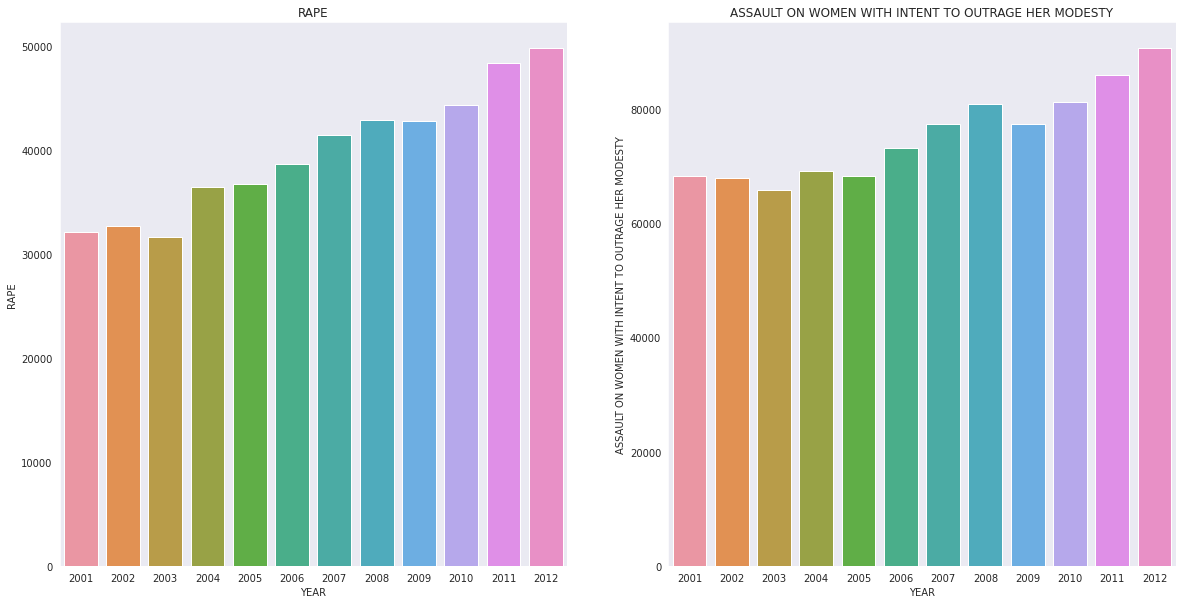

In [13]:
ipc_plot("RAPE","ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY")

We can see major increase in crime against women.

In 2012, nearly 50,000 cases were registered, many such cases go unreported or such cases are supressed by people in power

This is disheartening as Nation's first female President, Pratibha Patil, was president from 2007 - 2012

There have been nearly 90,000 cases od Assault on women, which also seem to be increasing 


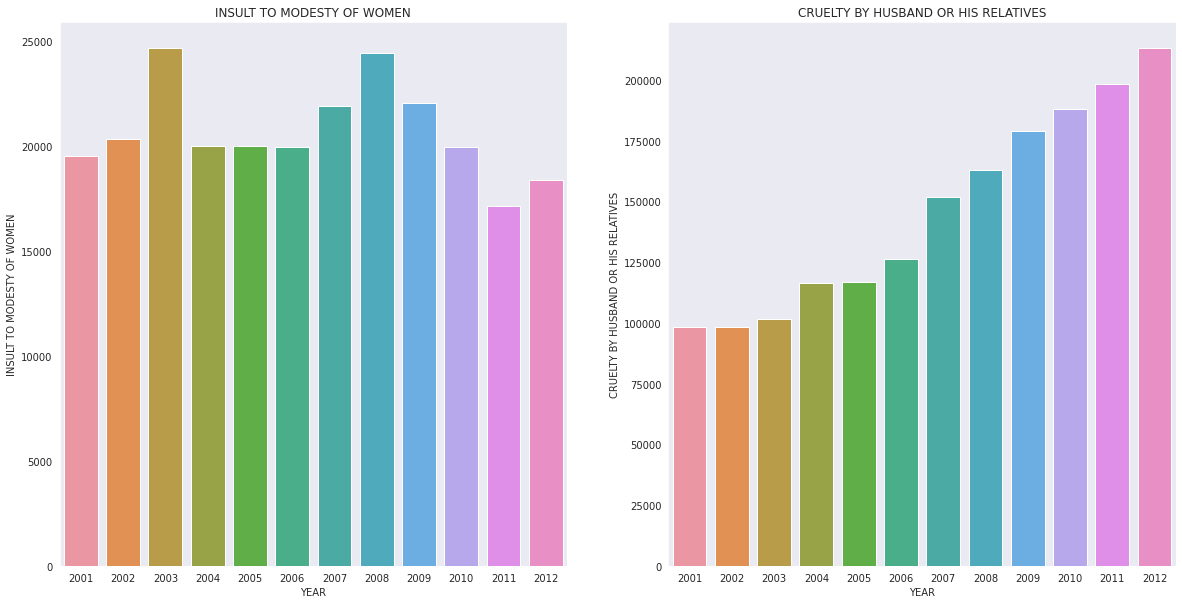

In [14]:
ipc_plot("INSULT TO MODESTY OF WOMEN", "CRUELTY BY HUSBAND OR HIS RELATIVES")

More than 2,00,000 cases of Cruelty from Husband or relatives in 2012, seems to be increasing exponentially

Insult to modesty of women seem to be decreasing, but no clear trend is seen

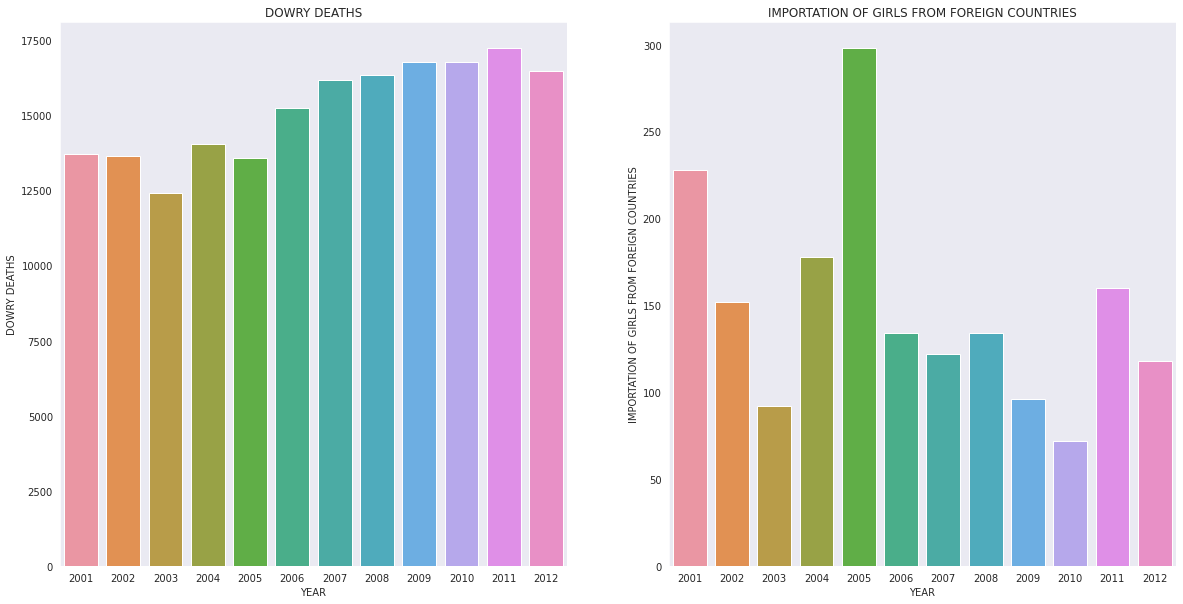

In [15]:
ipc_plot("DOWRY DEATHS", "IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES")

Dowry deaths also seem to be increasing after 2005,

We cans see the decrease in IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES, especially after 2006. But each year nearly 100 women are imported, usually for prostitution

### Kidnapping

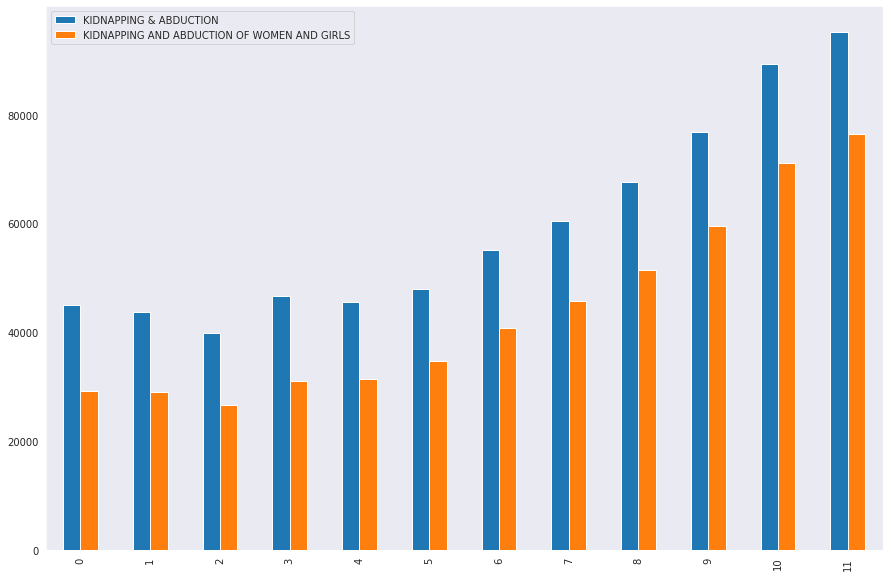

In [16]:
yearly[["KIDNAPPING & ABDUCTION", "KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS"]].plot(kind = 'bar', figsize=(15,10))

(Note: Kidnapping & Abduction bar is inclusive of kidnapping of women and girls)

These cases have increased exponentially. 

Majority of the kidnapping cases are of Women and Girls.

### Robbery and Dacoity

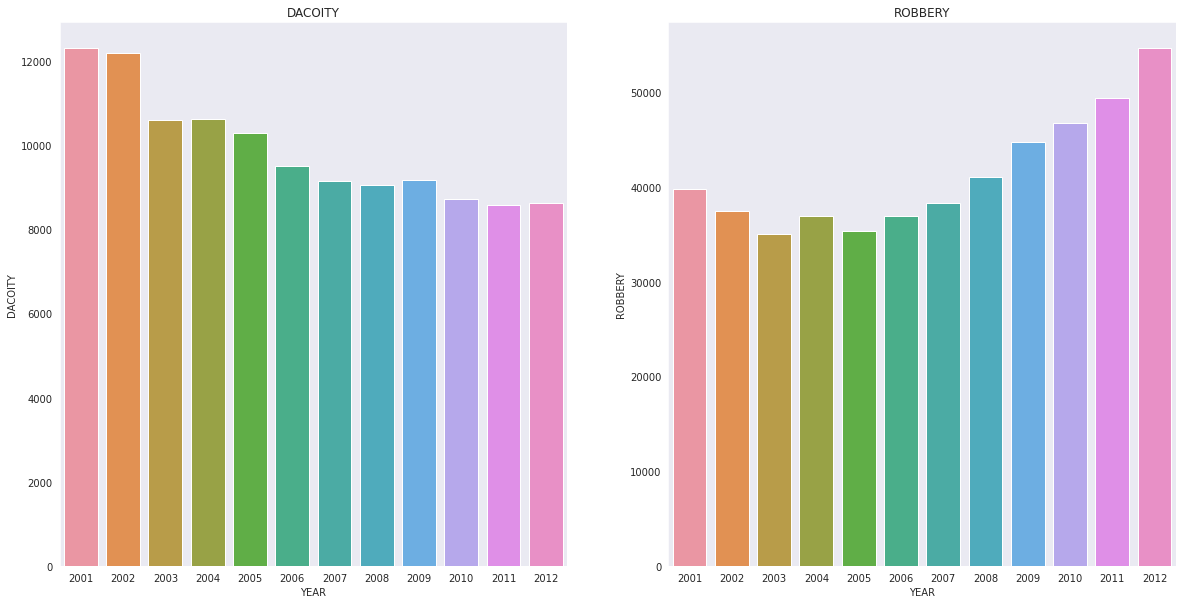

In [17]:
ipc_plot("DACOITY", "ROBBERY")

Difference between “Robbery” and “Dacoity:

Where five or more persons had committed or attempted to commit a robbery, it is called
dacoity A robbery is committed by one to four persons

While Dacoities have reduced tremendously, robberies have gone up

Nearly 50,000 robberies were commited in 2012 in India

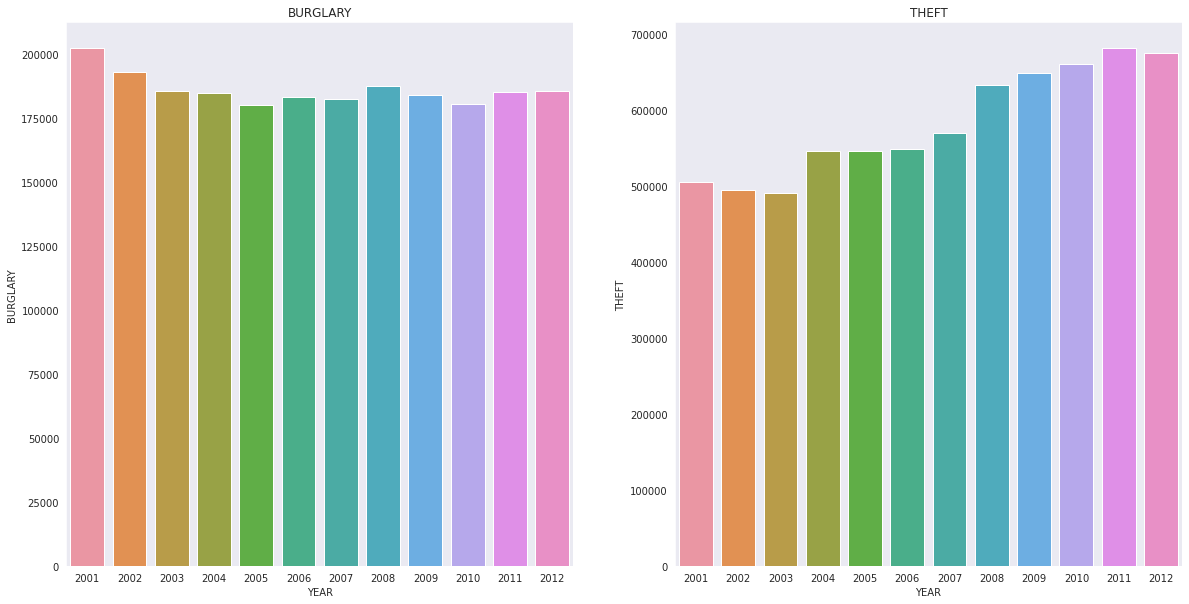

In [18]:
ipc_plot("BURGLARY", "THEFT")

**Theft** is when someone steals a movable property out of your possession with the intention of stealing it from you.

**Burglary**, also called breaking and entering and sometimes housebreaking, is illegally entering a building or other areas to commit a crime

### Auto theft

Text(0.5, 1.0, 'AUTO THEFT')

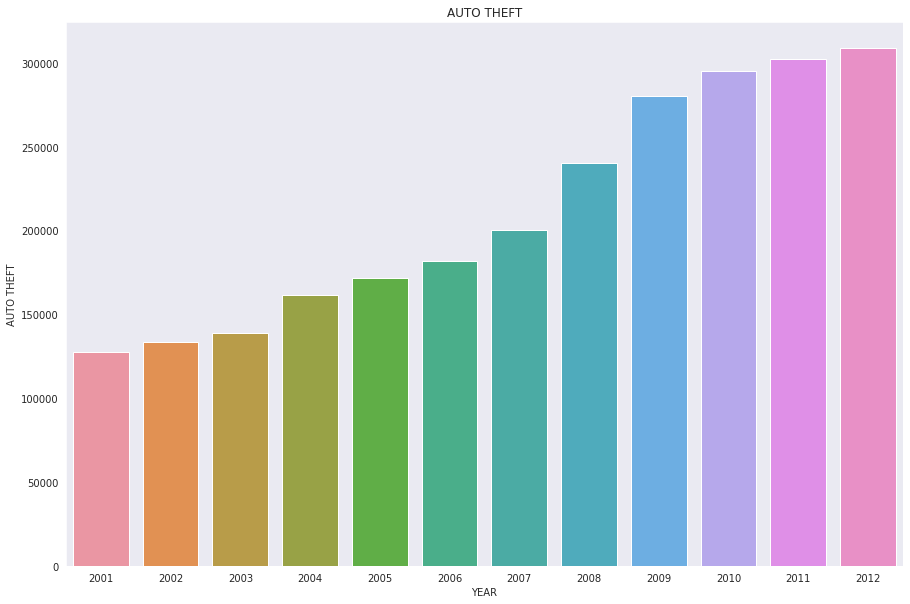

In [19]:
plt.figure().set_size_inches(15,10)
sns.barplot(x = 'YEAR', y = "AUTO THEFT", data = yearly, ci = None)
plt.title("AUTO THEFT")

### Cheating

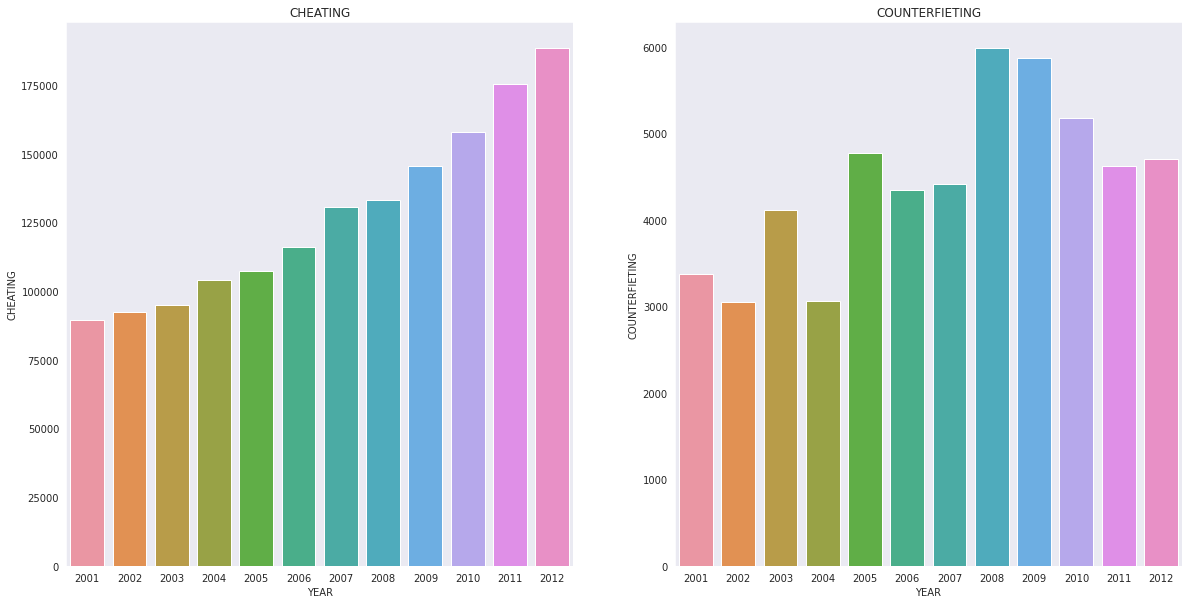

In [20]:
ipc_plot("CHEATING", "COUNTERFIETING")

Cheating cases have gone up almost linearly, while counterfieting has gone up slightly

According to the IPC, Section 420 states that **cheating** occures when a person dishonestly induces the victim to deliver any property to any person, or to make, alter or destroy the whole or any part of a valuable security, or anything which is signed or sealed, and which is capable of being converted into a valuable security

**Counterfieting**

A person is said to “counterfeit” who causes one thing to resemble another thing, intending by means of that resemblance to practise deception, or knowing it to be likely that deception will thereby be practised.

Text(0.5, 1.0, 'CRIMINAL BREACH OF TRUST')

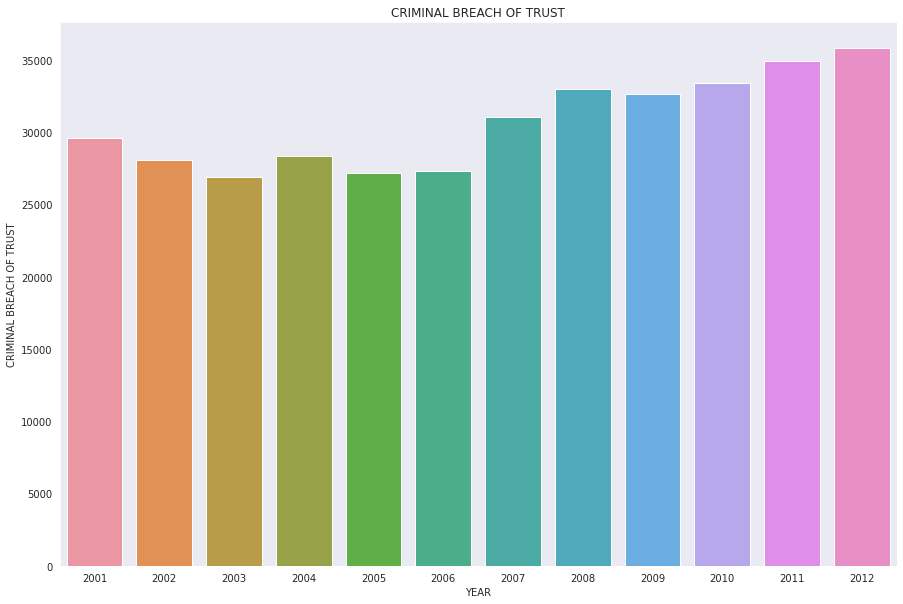

In [21]:
plt.figure().set_size_inches(15,10)
sns.barplot(x = 'YEAR', y = 'CRIMINAL BREACH OF TRUST', data = yearly, ci = None)
plt.title("CRIMINAL BREACH OF TRUST")

In criminal breach of trust, the offender is lawfully entrusted with the property and he dishonestly misappropriates it. 2. In theft, the offender comes in possession of the property without the consent of the person in possession.

# Area wise Crime

In [22]:
district_df

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,DACOITY,PREPARATION AND ASSEMBLY FOR DACOITY,ROBBERY,BURGLARY,THEFT,AUTO THEFT,OTHER THEFT,RIOTS,CRIMINAL BREACH OF TRUST,CHEATING,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,30,16,9,0,41,198,199,22,177,78,16,104,1,30,1131,16,149,34,175,0,181,1518,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,30,23,8,0,16,191,366,57,309,168,11,65,8,69,1543,7,118,24,154,0,270,754,4125
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,34,25,4,0,14,237,723,164,559,156,33,209,9,38,2088,14,112,83,186,0,404,1262,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,20,5,1,0,4,98,173,36,137,164,12,37,2,23,795,17,126,38,57,0,233,1181,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,26,23,4,0,25,437,1021,150,871,70,50,220,3,41,1244,12,109,58,247,0,431,2313,6507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9012,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,0,0,0,0,0,3,7,1,6,10,0,0,0,3,3,0,1,0,1,0,0,32,60
9013,LAKSHADWEEP,TOTAL,2012,0,0,0,0,0,0,0,0,0,0,0,0,3,7,1,6,10,0,0,0,3,3,0,1,0,1,0,0,32,60
9014,PUDUCHERRY,KARAIKAL,2012,5,6,2,6,0,6,2,2,0,0,1,3,21,81,53,28,17,1,15,1,1,186,0,2,0,1,0,44,392,787
9015,PUDUCHERRY,PUDUCHERRY,2012,24,21,10,7,0,7,17,14,3,5,14,13,56,577,409,168,109,8,75,5,20,632,0,7,2,5,0,219,1668,3494


In [23]:
states = district_df.groupby(["YEAR","STATE/UT"]).sum().reset_index()

In [24]:
states.head(20)

,YEAR,STATE/UT,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,DACOITY,PREPARATION AND ASSEMBLY FOR DACOITY,ROBBERY,BURGLARY,THEFT,AUTO THEFT,OTHER THEFT,RIOTS,CRIMINAL BREACH OF TRUST,CHEATING,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,2001,A & N ISLANDS,26,0,0,6,0,6,4,4,0,0,0,8,128,130,8,122,26,20,16,4,8,236,0,38,2,18,0,0,646,1316
1,2001,ANDHRA PRADESH,5204,3110,272,1742,0,1742,2364,1530,834,428,18,1258,14440,33502,6102,27400,6002,1576,10782,288,1744,69894,840,7088,4542,11582,14,14800,68688,260178
2,2001,ARUNACHAL PRADESH,166,106,6,66,0,66,166,110,56,44,4,168,496,886,72,814,48,82,60,8,26,932,0,156,6,22,0,0,1236,4684
3,2001,ASSAM,2712,962,80,1634,0,1634,2960,2140,820,1064,28,1374,4846,10734,700,10034,5906,748,1150,92,882,11610,118,1700,8,2496,0,4020,18630,73754
4,2001,BIHAR,7286,6838,500,1776,0,1776,4318,1036,3282,2582,294,4406,6466,19402,2100,17302,17212,1892,3318,170,1004,15088,1718,1124,42,3116,166,4812,73334,176864
5,2001,CHANDIGARH,30,20,12,36,0,36,112,100,12,10,0,44,728,3058,988,2070,182,52,310,4,10,190,6,48,30,72,0,12,1828,6794
6,2001,CHHATTISGARH,1760,1058,90,1918,0,1918,414,342,72,174,38,676,8288,9624,1840,7784,1742,308,804,16,430,10954,140,3526,322,1680,0,1378,31580,76920
7,2001,D & N HAVELI,6,4,0,12,0,12,8,4,4,0,0,4,68,90,30,60,8,26,24,2,2,58,0,14,0,8,0,0,366,700
8,2001,DAMAN & DIU,14,10,0,0,0,0,10,6,4,0,0,0,86,80,40,40,46,10,18,2,6,42,0,0,0,8,0,0,146,478
9,2001,DELHI UT,1094,1020,126,762,0,762,3254,1928,1326,96,148,1248,6058,38552,15788,22764,330,958,4366,84,100,4022,226,1004,180,276,0,864,44000,108768


Lets find which are the top 10 states in crime from 2001-2012:

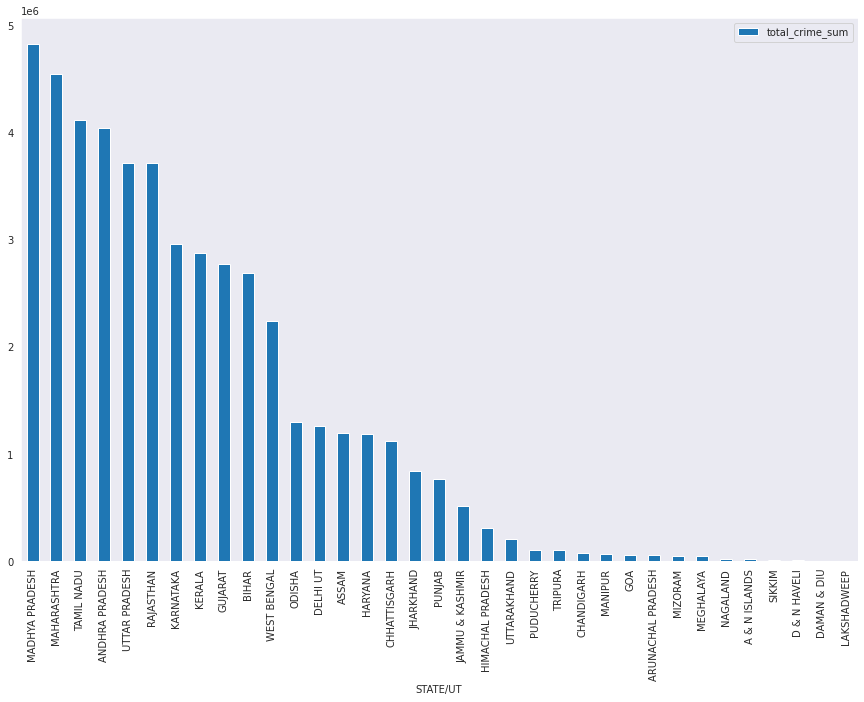

In [25]:
states.groupby(["STATE/UT"]).agg(total_crime_sum = ('TOTAL IPC CRIMES', 'sum')).sort_values(by = "total_crime_sum", ascending = False).plot(figsize = (15,10)
, kind = 'bar')

In [26]:
top10_states = states.groupby(["STATE/UT"]).agg(total_crime_sum = ('TOTAL IPC CRIMES', 'sum')).sort_values(by = "total_crime_sum", ascending = False).head(10)

Text(0.5, 1.0, 'Top 10 crime states, with figures from 2001-2012')

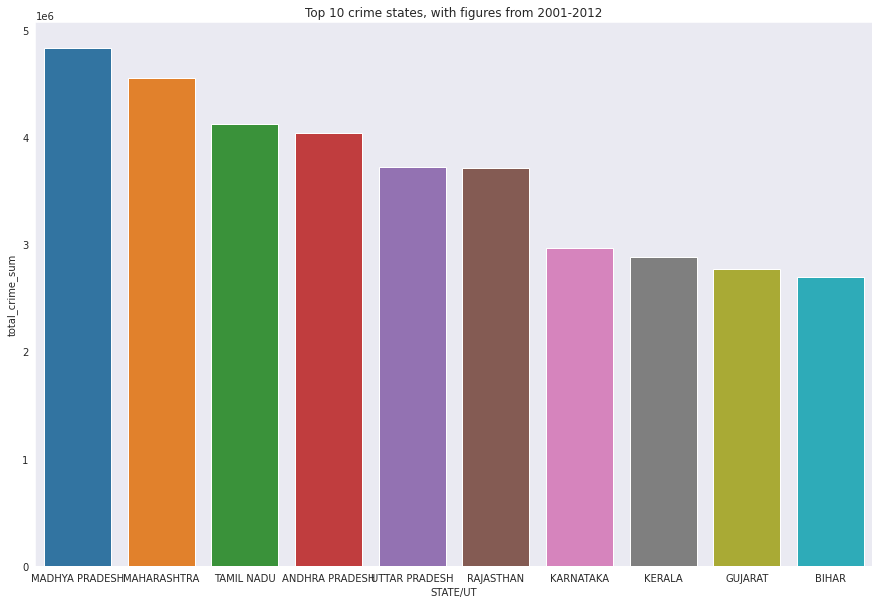

In [27]:
plt.figure().set_size_inches(15,10)
sns.barplot(x = "STATE/UT", y="total_crime_sum",  data = top10_states.reset_index())
plt.title("Top 10 crime states, with figures from 2001-2012")

In [28]:
#Lets find out the crime/population. Taking census data from google
population = {'UTTAR PRADESH' :	199812341,
             	'MAHARASHTRA' :	112374333, 	
 	            'BIHAR' :	104099452,
 	            'ANDHRA PRADESH' :	84580777,
 	            'MADHYA PRADESH' :	72626809,
 	            'TAMIL NADU'  : 72147030,
 	            'RAJASTHAN' :	68548437,
 	            'KARNATAKA' :	61095297,
              'KERALA' : 33406061,
              'GUJARAT': 60439692}
pop = pd.DataFrame(population, index = ["Population"]).T.reset_index()
pop.columns = ["STATE/UT", "POPULATION"]
pop

,STATE/UT,POPULATION
0,UTTAR PRADESH,199812341
1,MAHARASHTRA,112374333
2,BIHAR,104099452
3,ANDHRA PRADESH,84580777
4,MADHYA PRADESH,72626809
5,TAMIL NADU,72147030
6,RAJASTHAN,68548437
7,KARNATAKA,61095297
8,KERALA,33406061
9,GUJARAT,60439692


In [29]:
top10_states.reset_index(inplace = True)
top10_states = pd.merge(top10_states, pop, how = 'inner', on = "STATE/UT")
top10_states

,STATE/UT,total_crime_sum,POPULATION
0,MADHYA PRADESH,4827540,72626809
1,MAHARASHTRA,4546872,112374333
2,TAMIL NADU,4120352,72147030
3,ANDHRA PRADESH,4037962,84580777
4,UTTAR PRADESH,3716148,199812341
5,RAJASTHAN,3711832,68548437
6,KARNATAKA,2962126,61095297
7,KERALA,2874918,33406061
8,GUJARAT,2771550,60439692
9,BIHAR,2692586,104099452


Text(0.5, 1.0, 'CRIME/POPULATION')

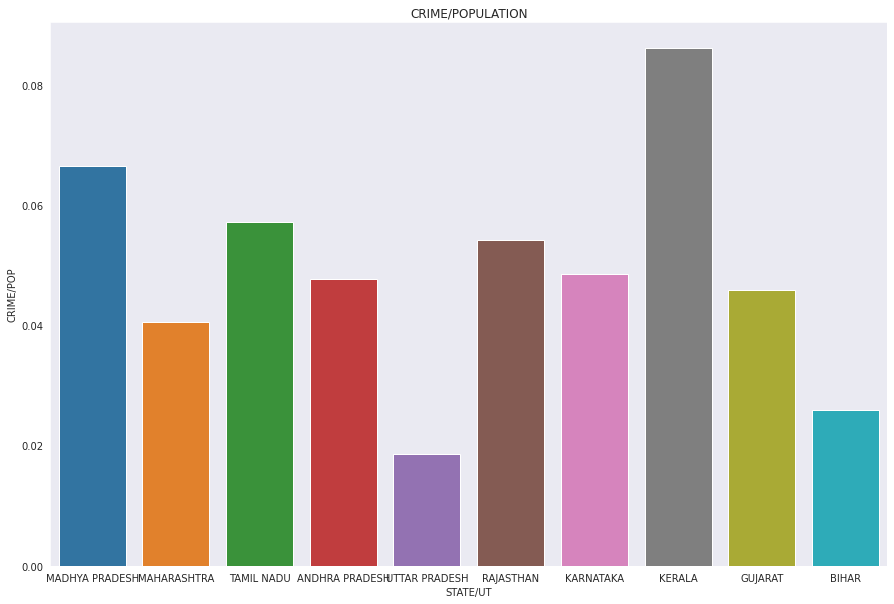

In [30]:
#top10_states.drop("index", axis = 1, inplace = True)
top10_states["CRIME/POP"] = top10_states["total_crime_sum"]/top10_states["POPULATION"]
plt.figure().set_size_inches(15,10)
sns.barplot(x = 'STATE/UT', y = 'CRIME/POP', data = top10_states)
plt.title("CRIME/POPULATION")

Interesting.

So the no of IPC crimes is highest in Madhya Pradesh, but the crime per population seems to be high in Kerala.

Madhya Pradesh has Law and Order problem, which should be addressed by the government and the police.

Other states like Maharashtra, Tamil Nadu, Andhra Pradesh, UttarPradesh also need special attention.

Lets see statewise which are the most common crimes

## Maharashtra

In [31]:
maha = district_df[district_df["STATE/UT"] == "MAHARASHTRA"]
maha.head()

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,DACOITY,PREPARATION AND ASSEMBLY FOR DACOITY,ROBBERY,BURGLARY,THEFT,AUTO THEFT,OTHER THEFT,RIOTS,CRIMINAL BREACH OF TRUST,CHEATING,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
352,MAHARASHTRA,AHMEDNAGAR,2001,97,41,1,44,0,44,37,25,12,20,6,104,312,715,168,547,266,37,59,7,44,575,0,74,2,496,0,479,975,4391
353,MAHARASHTRA,AKOLA,2001,64,41,0,15,0,15,15,14,1,9,0,41,298,735,81,654,99,15,59,16,48,836,2,109,7,189,0,116,1306,4020
354,MAHARASHTRA,AMRAVATI COMMR.,2001,44,29,3,23,0,23,27,23,4,10,0,48,259,812,163,649,95,10,41,2,15,429,10,43,26,55,0,60,796,2837
355,MAHARASHTRA,AMRAVATI RURAL,2001,72,23,0,42,0,42,29,25,4,1,0,36,359,1031,26,1005,112,12,31,1,23,884,4,99,38,92,0,126,640,3655
356,MAHARASHTRA,AURANGABAD COMMR.,2001,36,27,0,14,0,14,19,14,5,3,2,40,239,503,179,324,130,26,108,1,3,371,4,33,12,102,0,109,569,2351


In [32]:
#maha.drop("STATE/UT", axis = 1, inplace = True)
maha = maha.groupby(["DISTRICT", 'YEAR']).agg(np.sum).reset_index()

In [33]:
maha

,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,DACOITY,PREPARATION AND ASSEMBLY FOR DACOITY,ROBBERY,BURGLARY,THEFT,AUTO THEFT,OTHER THEFT,RIOTS,CRIMINAL BREACH OF TRUST,CHEATING,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,AHMEDNAGAR,2001,97,41,1,44,0,44,37,25,12,20,6,104,312,715,168,547,266,37,59,7,44,575,0,74,2,496,0,479,975,4391
1,AHMEDNAGAR,2002,82,45,6,45,0,45,27,20,7,19,11,97,352,841,239,602,296,56,69,1,38,663,8,75,0,280,0,445,1050,4506
2,AHMEDNAGAR,2003,101,38,2,44,0,44,27,13,14,17,13,102,302,786,232,554,254,29,77,6,44,575,15,51,3,287,0,480,998,4251
3,AHMEDNAGAR,2004,98,57,0,41,0,41,25,13,12,30,10,108,309,969,289,680,175,25,114,1,35,618,0,73,0,277,0,452,1321,4738
4,AHMEDNAGAR,2005,92,56,1,56,0,56,33,25,8,29,16,84,392,1025,279,746,206,36,142,3,26,768,0,91,0,338,0,474,1373,5241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
547,YAVATMAL,2008,74,55,5,43,0,43,34,33,1,4,4,55,259,980,130,850,147,20,38,4,56,955,6,114,30,171,0,280,1565,4899
548,YAVATMAL,2009,77,57,1,40,0,40,28,25,3,8,0,52,246,914,154,760,103,28,58,4,37,986,9,128,23,212,0,255,1384,4650
549,YAVATMAL,2010,68,43,5,33,0,33,52,49,3,4,1,78,280,898,181,717,139,17,50,5,40,915,7,121,38,165,0,273,1545,4777
550,YAVATMAL,2011,84,47,1,44,0,44,54,46,8,3,1,74,273,919,205,714,130,25,78,5,40,1005,8,118,37,198,0,255,1609,5008


Lets see which are the most common crimes:

In [34]:
maha[maha["DISTRICT"] == "TOTAL"].agg(np.mean).sort_values(ascending = False).head(10)

TOTAL IPC CRIMES                       189453.000000
OTHER IPC CRIMES                        46671.666667
THEFT                                   46400.583333
OTHER THEFT                             32381.250000
HURT/GREVIOUS HURT                      29480.000000
BURGLARY                                15468.083333
AUTO THEFT                              14019.333333
CAUSING DEATH BY NEGLIGENCE             11217.750000
RIOTS                                    7520.333333
CRUELTY BY HUSBAND OR HIS RELATIVES      6696.916667
dtype: float64

Burglary, Theft, Auto Theft, Assault on others(Hurt/Grevious hurt), Riots occur fairly frequent

Every year nearly 2000 murders and 2000 rapes take place

lets see year wise which were the most common crime District

In [35]:
maha2012 = maha[maha["YEAR"] == 2012]


In [36]:
maha2012.reset_index(inplace = True)
maha2012.set_index("DISTRICT", inplace = True)
maha2012["TOTAL IPC CRIMES"].sort_values(ascending = False)   #.plot(kind = 'bar', figsize = (15,10))

DISTRICT
TOTAL                202700
MUMBAI COMMR.         30508
PUNE COMMR.           12308
THANE COMMR.          10144
PUNE RURAL             8433
NAGPUR COMMR.          8277
AHMEDNAGAR             7246
THANE RURAL            6919
YAVATMAL               6365
NASIK RURAL            5216
NAVI MUMBAI            5157
SATARA                 5042
JALGAON                4954
NANDED                 4668
KOLHAPUR               4554
SOLAPUR RURAL          4476
AMRAVATI RURAL         4442
NASIK COMMR.           4390
BEED                   4099
CHANDRAPUR             3763
AURANGABAD COMMR.      3659
NAGPUR RURAL           3622
WARDHA                 3564
AURANGABAD RURAL       3562
BULDHANA               3497
AKOLA                  3442
LATUR                  3237
OSMANABAD              3055
JALNA                  3051
PARBHANI               2836
SANGLI                 2783
AMRAVATI COMMR.        2713
DHULE                  2542
MUMBAI RLY.            2325
WASHIM                 2241
RAIGAD     

So the majority of the crimes occur in the Urban areas of Mumbai, Thane, Nagpur, Pune

In [37]:
maha_max_crimes  = maha.groupby("YEAR").agg(yearly_crimes = ("TOTAL IPC CRIMES", 'sum'))
maha_max_crimes

,yearly_crimes
YEAR,
2001,342466
2002,330924
2003,328612
2004,352604
2005,374054
2006,383576
2007,391414
2008,412486
2009,399196


## Madhya Pradesh

In [38]:
mp = district_df[district_df["STATE/UT"] == "MADHYA PRADESH"]
mp

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,DACOITY,PREPARATION AND ASSEMBLY FOR DACOITY,ROBBERY,BURGLARY,THEFT,AUTO THEFT,OTHER THEFT,RIOTS,CRIMINAL BREACH OF TRUST,CHEATING,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
303,MADHYA PRADESH,BALAGHAT,2001,56,43,8,87,0,87,11,11,0,0,5,7,229,226,21,205,42,10,10,0,18,568,3,157,12,72,0,51,1310,2925
304,MADHYA PRADESH,BARWANI,2001,41,30,3,34,0,34,2,2,0,2,2,18,130,237,30,207,35,6,5,1,10,795,5,81,9,18,0,71,473,2008
305,MADHYA PRADESH,BETUL,2001,56,48,1,95,0,95,19,16,3,0,0,18,199,246,33,213,9,6,15,0,16,521,7,135,4,71,0,59,1112,2637
306,MADHYA PRADESH,BHIND,2001,63,97,2,31,0,31,47,20,27,3,8,28,223,283,25,258,99,9,28,1,17,851,34,80,2,54,0,88,1313,3361
307,MADHYA PRADESH,BHOPAL,2001,61,109,0,106,0,106,55,48,7,8,6,99,852,1351,425,926,77,33,192,0,8,652,15,252,56,132,0,272,9372,13708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8607,MADHYA PRADESH,TIKAMGARH,2012,43,27,6,61,0,61,13,8,5,0,0,24,91,105,34,71,48,2,13,0,5,1251,16,124,7,27,4,103,1332,3302
8608,MADHYA PRADESH,UJJAIN,2012,55,193,1,73,0,73,36,31,5,4,1,73,296,1079,560,519,83,22,64,1,35,281,11,180,53,202,0,156,5387,8286
8609,MADHYA PRADESH,UMARIYA,2012,12,3,0,22,0,22,4,2,2,1,0,7,55,68,19,49,10,0,14,0,6,95,0,68,7,17,0,0,873,1262
8610,MADHYA PRADESH,VIDISHA,2012,58,62,2,94,0,94,25,23,2,2,2,24,203,301,131,170,56,10,46,0,22,764,19,213,23,97,0,120,2480,4623


Lets see in 2012 what were the most frequent crimes

In [39]:
mp2012 = mp[mp["YEAR"] == 2012]
mp2012.reset_index(inplace = True)
mp2012.drop(["index", "STATE/UT"], axis = 1, inplace = True)
mp2012

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,DACOITY,PREPARATION AND ASSEMBLY FOR DACOITY,ROBBERY,BURGLARY,THEFT,AUTO THEFT,OTHER THEFT,RIOTS,CRIMINAL BREACH OF TRUST,CHEATING,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ALIRAJPUR,2012,60,33,0,22,0,22,13,12,1,1,1,16,58,82,50,32,9,2,2,0,13,259,0,31,1,2,0,90,660,1355
1,ANUPPUR,2012,35,15,1,62,0,62,8,8,0,1,0,15,128,108,35,73,17,23,28,0,11,126,12,80,6,53,0,74,991,1794
2,ASHOK NAGAR,2012,34,15,3,50,0,50,6,5,1,2,2,11,72,103,44,59,24,3,13,0,2,557,10,62,1,21,0,82,1401,2474
3,BALAGHAT,2012,43,22,6,78,0,78,9,7,2,0,0,13,128,131,60,71,48,10,22,1,14,248,6,113,11,63,0,109,1717,2792
4,BARWANI,2012,46,15,0,50,0,50,8,8,0,1,0,13,72,160,71,89,18,3,13,0,8,204,2,72,5,13,0,161,1162,2026
5,BETUL,2012,75,26,1,118,0,118,12,10,2,0,0,7,104,226,98,128,13,1,26,1,9,245,11,151,15,57,0,151,1831,3080
6,BHIND,2012,64,80,3,49,0,49,27,25,2,6,7,87,138,292,202,90,77,5,35,0,10,1318,40,83,7,50,0,186,1356,3920
7,BHOPAL,2012,78,96,0,143,0,143,63,49,14,2,2,200,1004,2605,1692,913,118,25,203,6,15,1361,19,244,52,254,0,270,7560,14320
8,BHOPAL RLY.,2012,4,8,1,4,0,4,1,1,0,1,1,25,5,1117,28,1089,1,2,2,0,0,1,0,14,1,3,0,2,236,1429
9,BURHANPUR,2012,11,12,0,23,0,23,6,5,1,0,0,7,45,90,24,66,8,6,24,0,1,493,2,42,22,47,0,42,555,1436


In [40]:
mp = mp.groupby(["DISTRICT", 'YEAR']).agg(np.sum).reset_index()
mp[mp["DISTRICT"] == "TOTAL"].agg(np.mean).sort_values(ascending = False)

TOTAL IPC CRIMES                                       201147.500000
OTHER IPC CRIMES                                        99715.166667
HURT/GREVIOUS HURT                                      34381.416667
THEFT                                                   21988.333333
OTHER THEFT                                             13645.666667
BURGLARY                                                11445.500000
AUTO THEFT                                               8342.666667
ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY      6656.500000
CAUSING DEATH BY NEGLIGENCE                              5414.083333
CRUELTY BY HUSBAND OR HIS RELATIVES                      3330.750000
RAPE                                                     3007.250000
OTHER RAPE                                               3007.166667
RIOTS                                                    2593.666667
ATTEMPT TO MURDER                                        2454.833333
MURDER                            

Assault on a person,Theft, Burglary, Auto Theft are the most common crime

There were nearly 2000 murders, 3000 rapes

In [41]:
mp_max_crimes  = mp.groupby("YEAR").agg(yearly_crimes = ("TOTAL IPC CRIMES", 'sum'))
mp_max_crimes

,yearly_crimes
YEAR,
2001,363482
2002,383598
2003,382156
2004,393734
2005,378344
2006,389422
2007,404772
2008,413112
2009,415524


## Tamil Nadu

In [42]:
tn = district_df[district_df["STATE/UT"]== "TAMIL NADU"]
tn

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,DACOITY,PREPARATION AND ASSEMBLY FOR DACOITY,ROBBERY,BURGLARY,THEFT,AUTO THEFT,OTHER THEFT,RIOTS,CRIMINAL BREACH OF TRUST,CHEATING,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
535,TAMIL NADU,ARIYALUR,2001,24,41,1,6,0,6,25,14,11,0,0,3,37,124,45,79,101,4,22,0,17,495,3,38,4,8,0,60,741,1754
536,TAMIL NADU,CHENGAI,2001,78,98,0,20,0,20,8,8,0,9,0,52,454,933,268,665,119,12,96,4,0,699,16,58,8,57,0,521,3793,7035
537,TAMIL NADU,CHENNAI,2001,91,298,0,28,0,28,40,0,40,12,0,127,668,2167,433,1734,105,26,600,0,0,813,13,70,209,111,0,675,1239,7292
538,TAMIL NADU,CHENNAI RLY.,2001,5,1,0,0,0,0,0,0,0,1,0,8,0,154,0,154,15,0,7,0,0,24,0,5,0,2,0,0,271,493
539,TAMIL NADU,COIMBATORE RURAL,2001,77,49,3,18,0,18,38,27,11,11,1,41,346,1008,395,613,455,36,102,4,30,1044,16,75,25,49,0,672,5015,9115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8847,TAMIL NADU,TRICHY URBAN,2012,26,22,0,7,0,7,22,13,9,0,0,56,42,253,52,201,7,0,103,5,3,146,3,9,39,24,0,147,2012,2926
8848,TAMIL NADU,VELLORE,2012,76,82,11,24,0,24,76,68,8,6,0,40,188,489,251,238,9,18,71,23,17,789,8,38,0,61,0,735,4949,7710
8849,TAMIL NADU,VILLUPURAM,2012,100,211,4,78,0,78,202,188,14,7,1,51,189,601,335,266,486,1,99,1,59,1326,4,239,0,58,0,879,5890,10486
8850,TAMIL NADU,VIRUDHUNAGAR,2012,62,97,0,23,0,23,39,32,7,3,0,51,127,264,32,232,80,35,171,2,24,552,2,23,110,47,0,289,3503,5504


In [43]:
tn = tn.groupby(["DISTRICT", "YEAR"]).agg(np.sum).reset_index()
tn[tn["DISTRICT"] == "TOTAL"].agg(np.mean).sort_values(ascending = False)

TOTAL IPC CRIMES                                       171681.333333
OTHER IPC CRIMES                                        98842.916667
HURT/GREVIOUS HURT                                      23389.416667
THEFT                                                   15430.000000
CAUSING DEATH BY NEGLIGENCE                             11682.750000
OTHER THEFT                                             11292.250000
BURGLARY                                                 4444.916667
AUTO THEFT                                               4137.750000
RIOTS                                                    3114.000000
CHEATING                                                 2640.750000
ATTEMPT TO MURDER                                        2216.416667
YEAR                                                     2006.500000
MURDER                                                   1677.250000
ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY      1610.750000
CRUELTY BY HUSBAND OR HIS RELATIVE

As we hav seen with the other states, Theft, Auto Theft, Assault make up majority of the cases, a trend we saw in the other two states

No of Murder cases are less, also Rapes are less, nearly 600 per year

## Andhra Pradesh

In [44]:
ap = district_df[district_df["STATE/UT"] == "ANDHRA PRADESH"]
ap

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,DACOITY,PREPARATION AND ASSEMBLY FOR DACOITY,ROBBERY,BURGLARY,THEFT,AUTO THEFT,OTHER THEFT,RIOTS,CRIMINAL BREACH OF TRUST,CHEATING,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,30,16,9,0,41,198,199,22,177,78,16,104,1,30,1131,16,149,34,175,0,181,1518,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,30,23,8,0,16,191,366,57,309,168,11,65,8,69,1543,7,118,24,154,0,270,754,4125
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,34,25,4,0,14,237,723,164,559,156,33,209,9,38,2088,14,112,83,186,0,404,1262,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,20,5,1,0,4,98,173,36,137,164,12,37,2,23,795,17,126,38,57,0,233,1181,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,26,23,4,0,25,437,1021,150,871,70,50,220,3,41,1244,12,109,58,247,0,431,2313,6507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8235,ANDHRA PRADESH,VIZIANAGARAM,2012,44,36,7,44,0,44,21,20,1,2,0,4,162,263,2,261,1,11,118,0,15,1504,3,96,103,363,0,289,1396,4482
8236,ANDHRA PRADESH,WARANGAL,2012,75,47,10,56,0,56,66,58,8,3,0,22,262,388,69,319,173,5,197,6,25,1482,20,117,34,101,0,306,1327,4722
8237,ANDHRA PRADESH,WARANGAL URBAN,2012,41,17,1,30,0,30,41,39,2,2,0,14,193,421,98,323,70,3,281,1,8,1071,9,71,74,267,0,226,742,3583
8238,ANDHRA PRADESH,WEST GODAVARI,2012,91,91,4,130,0,130,86,59,27,4,0,52,452,1008,294,714,11,49,403,14,37,2313,19,296,235,757,0,578,1237,7867


In [45]:
ap = ap.groupby(["DISTRICT", "YEAR"]).agg(np.sum).reset_index()
ap[ap["DISTRICT"] == "TOTAL"].agg(np.mean).sort_values(ascending = False)

TOTAL IPC CRIMES                                       168248.416667
HURT/GREVIOUS HURT                                      45547.083333
OTHER IPC CRIMES                                        40187.666667
THEFT                                                   23932.500000
OTHER THEFT                                             17878.833333
CAUSING DEATH BY NEGLIGENCE                             11536.250000
CRUELTY BY HUSBAND OR HIS RELATIVES                      9917.250000
CHEATING                                                 8236.916667
BURGLARY                                                 8111.333333
AUTO THEFT                                               6053.666667
ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY      4333.250000
INSULT TO MODESTY OF WOMEN                               3010.916667
MURDER                                                   2646.333333
RIOTS                                                    2288.250000
YEAR                              

Assault, theft, Cheating is hgh here.
Also, Cruelty by Husband or relatives is high

Muruder is also higher than other states at 3000, but rapes are lower compared with other states at 1123

## Uttar Pradesh

In [46]:
up = district_df[district_df["STATE/UT"] == "UTTAR PRADESH"]
up

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,DACOITY,PREPARATION AND ASSEMBLY FOR DACOITY,ROBBERY,BURGLARY,THEFT,AUTO THEFT,OTHER THEFT,RIOTS,CRIMINAL BREACH OF TRUST,CHEATING,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
579,UTTAR PRADESH,AGRA,2001,153,162,18,66,0,66,203,132,71,50,3,171,432,1181,509,672,377,148,229,4,14,518,63,110,114,327,0,234,2085,6662
580,UTTAR PRADESH,ALIGARH,2001,229,242,21,50,0,50,123,78,45,39,4,182,190,727,219,508,366,120,145,3,32,446,44,90,54,258,0,189,1134,4688
581,UTTAR PRADESH,ALLAHABAD,2001,167,224,30,42,0,42,96,75,21,13,0,81,368,850,176,674,260,136,25,3,38,1024,56,85,105,226,0,215,2052,6096
582,UTTAR PRADESH,AMBEDKAR NAGAR,2001,46,49,7,19,0,19,29,29,0,4,0,22,95,116,9,107,64,16,43,2,13,244,14,15,9,87,0,38,447,1379
583,UTTAR PRADESH,AURAIYA,2001,53,53,11,11,0,11,61,25,36,9,0,24,36,82,10,72,44,8,14,1,13,247,21,13,7,26,0,82,321,1137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8934,UTTAR PRADESH,ST.RAVIDASNAGAR,2012,10,20,7,4,0,4,18,18,0,0,0,2,18,47,20,27,6,15,36,1,0,56,7,6,0,13,0,52,148,466
8935,UTTAR PRADESH,SULTANPUR,2012,44,80,13,26,0,26,67,63,4,7,0,33,108,279,150,129,90,17,48,0,13,243,15,29,0,84,0,129,496,1821
8936,UTTAR PRADESH,UNNAO,2012,60,46,26,41,0,41,182,174,8,1,0,14,90,201,88,113,46,47,111,1,2,35,44,81,0,141,0,307,1207,2683
8937,UTTAR PRADESH,VARANASI,2012,59,62,13,21,0,21,99,85,14,0,0,28,94,700,444,256,96,132,341,24,1,216,35,26,0,177,0,223,1118,3465


In [47]:
up = up.groupby(["DISTRICT", "YEAR"]).agg(np.sum).reset_index()
up[up["DISTRICT"] == "TOTAL"].agg(np.mean).sort_values(ascending = False)

TOTAL IPC CRIMES                                       154839.500000
OTHER IPC CRIMES                                        52245.750000
THEFT                                                   26003.916667
OTHER THEFT                                             13816.333333
AUTO THEFT                                              12187.583333
HURT/GREVIOUS HURT                                      11645.833333
CAUSING DEATH BY NEGLIGENCE                              9485.083333
CHEATING                                                 6996.666667
CRUELTY BY HUSBAND OR HIS RELATIVES                      6468.083333
BURGLARY                                                 5465.583333
MURDER                                                   5453.583333
ATTEMPT TO MURDER                                        5043.333333
KIDNAPPING & ABDUCTION                                   4938.833333
RIOTS                                                    4509.166667
KIDNAPPING AND ABDUCTION OF WOMEN 

Theft, Assault, Auto theft seems to be high. Also a high number of cruelty by husband and relatives, Cheating

Murders are higher than any other states at 5400, and rapes are nearly 1588 per year

## Kerala

In [48]:
kerala = district_df[district_df["STATE/UT"] == "KERALA"]
kerala

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,DACOITY,PREPARATION AND ASSEMBLY FOR DACOITY,ROBBERY,BURGLARY,THEFT,AUTO THEFT,OTHER THEFT,RIOTS,CRIMINAL BREACH OF TRUST,CHEATING,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
286,KERALA,ALAPUZHA,2001,22,32,2,21,0,21,8,6,2,2,0,18,227,195,109,86,419,18,152,9,35,1373,1,162,2,105,0,0,4516,7319
287,KERALA,CBCID,2001,22,7,0,2,0,2,2,0,2,1,0,1,5,5,0,5,6,18,37,119,1,5,0,0,0,4,0,0,15,250
288,KERALA,ERNAKULAM,2001,44,67,7,38,0,38,20,7,13,25,0,80,592,1264,294,970,626,22,267,12,25,1756,3,162,3,161,0,0,9669,14843
289,KERALA,IDUKKI,2001,33,30,1,34,0,34,0,0,0,3,0,16,240,254,39,215,301,55,78,0,10,1726,0,145,16,127,0,0,2352,5421
290,KERALA,KANNUR,2001,26,58,4,42,0,42,12,7,5,1,0,18,277,213,75,138,831,17,183,8,6,1175,0,77,7,157,0,0,2776,5888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8553,KERALA,THRISSUR RURAL,2012,18,49,9,46,0,46,12,9,3,6,9,40,136,202,56,146,588,19,341,7,38,784,2,218,36,361,0,3,10479,13403
8554,KERALA,TRIVANDRUM COMMR.,2012,14,12,1,41,0,41,23,16,7,4,106,101,154,285,101,184,629,11,304,0,10,1116,0,226,19,159,0,2,4036,7253
8555,KERALA,TRIVANDRUM RURAL,2012,42,49,15,97,0,97,18,10,8,8,31,48,287,313,97,216,826,15,294,15,37,1960,8,541,38,398,0,4,5021,10065
8556,KERALA,WAYANADU,2012,10,5,5,36,0,36,12,9,3,0,2,13,79,52,14,38,260,6,139,0,8,751,1,79,15,95,0,3,1319,2890


In [49]:
kerala = kerala.groupby(["DISTRICT", "YEAR"]).agg(np.sum).reset_index()
kerala[kerala["DISTRICT"] == "TOTAL"].agg(np.mean).sort_values(ascending = False)

TOTAL IPC CRIMES                                       119788.250000
OTHER IPC CRIMES                                        69156.916667
HURT/GREVIOUS HURT                                      19370.916667
RIOTS                                                    8022.833333
THEFT                                                    5196.083333
BURGLARY                                                 3864.250000
CRUELTY BY HUSBAND OR HIS RELATIVES                      3839.500000
CHEATING                                                 3646.500000
OTHER THEFT                                              3407.250000
ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY      2624.166667
YEAR                                                     2006.500000
AUTO THEFT                                               1788.833333
ROBBERY                                                   694.083333
RAPE                                                      620.583333
OTHER RAPE                        

Uniquely, there are huge number of riots in Kerala, nearly 8000 a year!

Murder and Rapes seem to be lower than other states, but here population is low

# Crime against Women

In [50]:
upload2 = files.upload()


Saving women_victims_of_rape.csv to women_victims_of_rape.csv


In [51]:
victim_rape_df = pd.read_csv(io.BytesIO(upload2["women_victims_of_rape.csv"]))
victim_rape_df

,Area_Name,Year,Subgroup,Rape_Cases_Reported,Victims_Above_50_Yrs,Victims_Between_10-14_Yrs,Victims_Between_14-18_Yrs,Victims_Between_18-30_Yrs,Victims_Between_30-50_Yrs,Victims_of_Rape_Total,Victims_Upto_10_Yrs
0,Andaman & Nicobar Islands,2001,Total Rape Victims,3,0,0,3,0,0,3,0
1,Andaman & Nicobar Islands,2001,Victims of Incest Rape,1,0,0,1,0,0,1,0
2,Andaman & Nicobar Islands,2001,Victims of Other Rape,2,0,0,2,0,0,2,0
3,Andaman & Nicobar Islands,2002,Total Rape Victims,2,0,0,1,1,0,2,0
4,Andaman & Nicobar Islands,2002,Victims of Incest Rape,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1045,West Bengal,2009,Victims of Incest Rape,3,0,0,1,1,1,3,0
1046,West Bengal,2009,Victims of Other Rape,2333,0,18,84,1834,391,2333,6
1047,West Bengal,2010,Total Rape Victims,2311,0,22,51,1779,459,2311,0
1048,West Bengal,2010,Victims of Incest Rape,4,0,1,0,2,1,4,0


In [52]:
victim_rape_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Area_Name                  1050 non-null   object
 1   Year                       1050 non-null   int64 
 2   Subgroup                   1050 non-null   object
 3   Rape_Cases_Reported        1050 non-null   int64 
 4   Victims_Above_50_Yrs       1050 non-null   int64 
 5   Victims_Between_10-14_Yrs  1050 non-null   int64 
 6   Victims_Between_14-18_Yrs  1050 non-null   int64 
 7   Victims_Between_18-30_Yrs  1050 non-null   int64 
 8   Victims_Between_30-50_Yrs  1050 non-null   int64 
 9   Victims_of_Rape_Total      1050 non-null   int64 
 10  Victims_Upto_10_Yrs        1050 non-null   int64 
dtypes: int64(9), object(2)
memory usage: 90.4+ KB


In [53]:
victim_rape_df.groupby("Area_Name").agg(np.sum).reset_index().drop("Year", axis = 1).sort_values(by = "Rape_Cases_Reported", ascending = False)

,Area_Name,Rape_Cases_Reported,Victims_Above_50_Yrs,Victims_Between_10-14_Yrs,Victims_Between_14-18_Yrs,Victims_Between_18-30_Yrs,Victims_Between_30-50_Yrs,Victims_of_Rape_Total,Victims_Upto_10_Yrs
19,Madhya Pradesh,58512,362,4998,11108,29064,11566,58514,1416
34,West Bengal,32756,20,312,546,25172,6580,32756,126
32,Uttar Pradesh,30106,24,2848,6184,16152,4172,30106,726
20,Maharashtra,28892,126,2610,8304,13120,2970,29010,1880
3,Assam,25524,190,306,818,17014,7104,25524,92
28,Rajasthan,23898,210,1100,3750,13732,4660,23908,456
4,Bihar,22526,78,204,1000,16988,4194,22526,62
1,Andhra Pradesh,21392,198,2510,4022,11262,2540,21392,860
6,Chhattisgarh,19502,226,2414,3986,8678,3608,19502,590
25,Odisha,17720,60,396,1070,12844,3074,17720,276


Lets see what the total number of rapes for India is:

In [54]:
victim_rape_df.drop("Year", axis = 1).agg(np.sum)

Area_Name                    Andaman & Nicobar IslandsAndaman & Nicobar Isl...
Subgroup                     Total Rape VictimsVictims of Incest RapeVictim...
Rape_Cases_Reported                                                     380016
Victims_Above_50_Yrs                                                      1960
Victims_Between_10-14_Yrs                                                24840
Victims_Between_14-18_Yrs                                                55740
Victims_Between_18-30_Yrs                                               223584
Victims_Between_30-50_Yrs                                                63248
Victims_of_Rape_Total                                                   380308
Victims_Upto_10_Yrs                                                      10936
dtype: object

In [55]:
victim_rape_df['Year'].unique()

array([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010])

In [56]:
age_wise = victim_rape_df.drop(["Year", "Subgroup", "Area_Name"], axis = 1).agg(np.sum)


In [57]:
age_wise_proportion = {}
for i in age_wise.index:
  if i == "Rape_Cases_Reported":
    continue
  elif i == "Victims_of_Rape_Total":
    continue
  else:
    age_wise_proportion[i] = (age_wise[i]/age_wise["Victims_of_Rape_Total"])*100

In [58]:
age_wise_df = pd.DataFrame(age_wise_proportion, index = ["Proportion"]).T
age_wise_df

,Proportion
Victims_Above_50_Yrs,0.515372
Victims_Between_10-14_Yrs,6.531548
Victims_Between_14-18_Yrs,14.656542
Victims_Between_18-30_Yrs,58.790244
Victims_Between_30-50_Yrs,16.630731
Victims_Upto_10_Yrs,2.875564


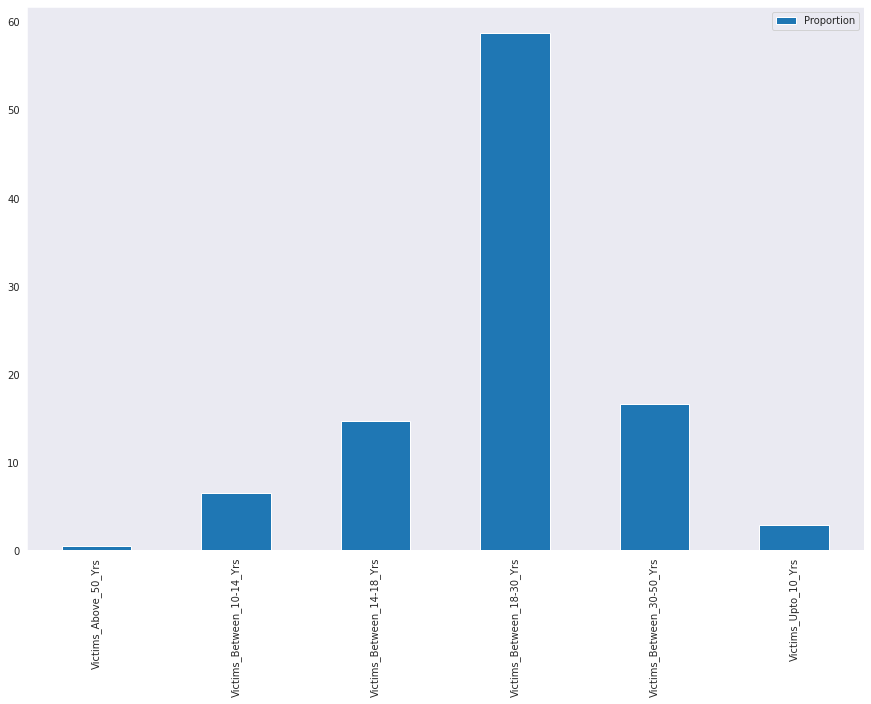

In [59]:
age_wise_df.plot(kind = 'bar', figsize = (15,10))

In 10 years 380016 rape cases were reported, yearly approx 38000, Monthly approx 3166 cases, daily 105.

These only are 'Reported cases', if we take into account unreported rapes the number would be humongous.

**Police found out 380308 victims of rapes**

**Women between age 18-30 are most commonly raped, and make up 60% of the cases**

**women between age 30-50 make up 16% of the cases**

**Girls below age of 14 make up 20% of the cases**

**Women above 50 years old make up 0.5% of the cases**

**In many of the cases, we see that the victim actually knew the offender.Lets explore that data** 

In [60]:
upload3 = files.upload()


Saving women_Offenders_known_to_the_victim.csv to women_Offenders_known_to_the_victim.csv


In [61]:
offender_known = pd.read_csv(io.BytesIO(upload3["women_Offenders_known_to_the_victim.csv"]))
offender_known.head()

,Area_Name,Year,No_of_Cases_in_which_offenders_were_known_to_the_Victims,No_of_Cases_in_which_offenders_were_Neighbours,No_of_Cases_in_which_offenders_were_Other_Known_persons,No_of_Cases_in_which_offenders_were_Parentsclose_family_members,No_of_Cases_in_which_offenders_were_Relatives
0,Madhya Pradesh,2007,3010,1397,1384,49,180
1,Madhya Pradesh,2008,2937,1279,1433,52,173
2,Madhya Pradesh,2009,2998,1254,1528,14,202
3,Madhya Pradesh,2010,3135,1223,1659,21,232
4,West Bengal,2010,2134,1037,987,4,106


In [62]:
offender_known = offender_known.drop(["Area_Name", "Year"], axis = 1).agg(np.sum)

In [63]:
offender_dict = {}
for i in offender_known.index:
  if i == "No_of_Cases_in_which_offenders_were_known_to_the_Victims":
    continue
  else:
    offender_dict[i] = (offender_known[i]/offender_known["No_of_Cases_in_which_offenders_were_known_to_the_Victims"])*100

offender_prop = pd.DataFrame(offender_dict, index = ["Proportion"]).T
offender_prop

,Proportion
No_of_Cases_in_which_offenders_were_Neighbours,34.572643
No_of_Cases_in_which_offenders_were_Other_Known_persons,56.249777
No_of_Cases_in_which_offenders_were_Parentsclose_family_members,2.502760
No_of_Cases_in_which_offenders_were_Relatives,6.673632


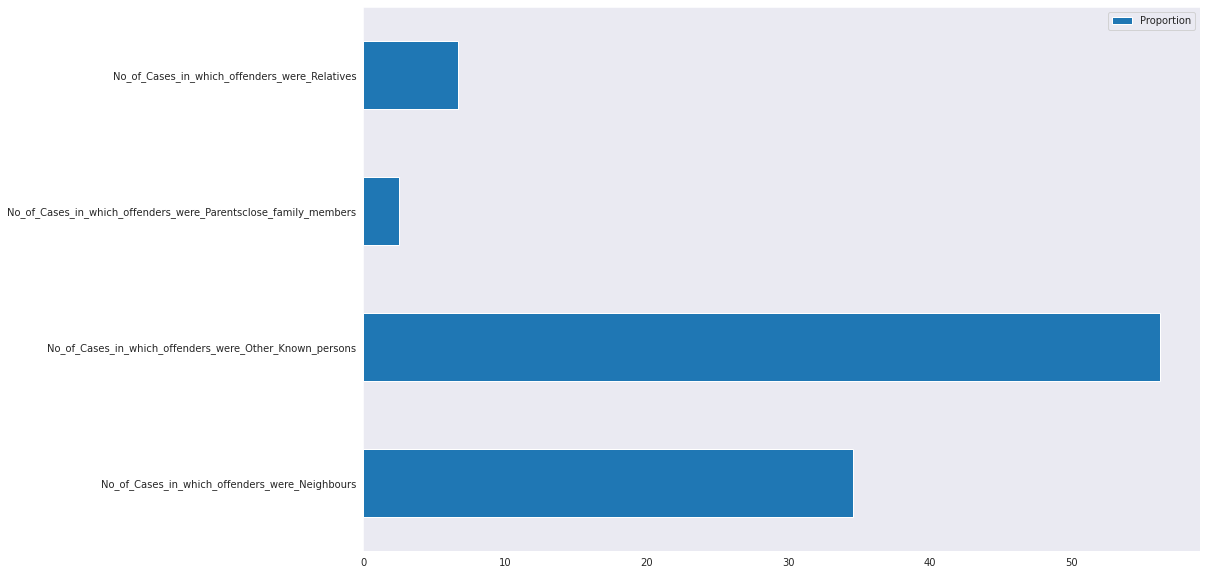

In [64]:
offender_prop.plot(kind = 'barh', figsize = (15,10))

In most of the cases, the rapist is a person who is known to the victim. (In 2018, 94% of the rapist were known to the victim - Source: https://www.indiatoday.in/india/story/rapes-in-india-offenders-victim-minor-data-ncrb-1635691-2020-01-10)

Neighbors and people known to the victim (baring family members) were responsible for almost 90% of the cases.

Relatives and close family members also were responsible for around 10% of the cases 

**Lets explore the conviction rate of the cases.**

The main complaint of Indian citizens is the influence of politics in courts and the long time taken for the complete trail

In [65]:
upload4 = files.upload()

Saving women_arrest_crime_women.csv to women_arrest_crime_women.csv


In [78]:
crime_women = pd.read_csv(io.BytesIO(upload4["women_arrest_crime_women.csv"]))

In [67]:
crime_women.shape

(4165, 16)

In [68]:
crime_women.head(10)

,Area_Name,Year,Group_Name,Sub_Group_Name,Persons_Acquitted,Persons_against_whom_cases_Compounded_or_Withdrawn,Persons_Arrested,Persons_Chargesheeted,Persons_Convicted,Persons_in_Custody_or_on_Bail_during_Investigation_at_Year_beginning,Persons_in_Custody_or_on_Bail_during_Investigation_at_Year_end,Persons_in_Custody_or_on_Bail_during_Trial_at_Year_End,Persons_Released_or_Freed_by_Police_or_Magistrate_before_Trial_for_want_of_evidence_or_any_other_reason,Persons_Trial_Completed,Persons_under_Trial_at_Year_beginning,Total_Persons_under_Trial
0,Andaman & Nicobar Islands,2001,Rape,01. Rape,6,0,3,3,0,6,6,45,0,6,48,51
1,Andhra Pradesh,2001,Rape,01. Rape,1168,13,1150,1021,246,450,545,2191,34,1414,2597,3618
2,Arunachal Pradesh,2001,Rape,01. Rape,1,0,51,31,2,25,30,347,15,3,319,350
3,Assam,2001,Rape,01. Rape,403,14,928,585,120,806,959,2331,190,523,2283,2868
4,Bihar,2001,Rape,01. Rape,756,0,1400,1302,217,719,576,5963,241,973,5634,6936
5,Chandigarh,2001,Rape,01. Rape,12,0,32,31,2,0,0,59,1,14,42,73
6,Chhattisgarh,2001,Rape,01. Rape,636,67,1134,1213,276,116,37,4918,0,912,4684,5897
7,Dadra & Nagar Haveli,2001,Rape,01. Rape,9,0,10,11,1,2,1,32,0,10,31,42
8,Daman & Diu,2001,Rape,01. Rape,3,0,0,1,0,1,0,1,0,3,3,4
9,Delhi,2001,Rape,01. Rape,166,0,454,394,157,114,159,2597,15,323,2526,2920


In [69]:
crime_women["Sub_Group_Name"].unique()

array(['01. Rape', '02. Kidnapping & Abduction of Women & Girls',
       '03. Dowry Deaths', '04. Molestation', '05. Sexual Harassment',
       '06. Cruelty by Husband and Relatives', '07. Importation of Girls',
       '08. Immoral Traffic Prevention Act', '09. Dowry Prohibition',
       '10. Indecent Representation of Women(Prohibition) Act',
       '11. Sati Prevention Act', '12. Total Crimes Against Women'],
      dtype=object)

In [70]:
crime_women["Group_Name"].unique()

array(['Rape', 'Kidnapping & Abduction - Women & Girls', 'Dowry Deaths',
       'Molestation', 'Sexual harassment',
       'Cruelty by Husband and Relatives', 'Importation of Girls',
       'Immoral Traffic (Prevention) Act', 'Dowry Prohibition Act',
       'Indecent Representation of Women (Prohibition) Act',
       'Sati Prevention Act', 'Total Crime Against Women'], dtype=object)

In [79]:
crime_women.drop("Sub_Group_Name", axis = 1, inplace = True)

In [80]:
crime_rape  = crime_women[crime_women["Group_Name"] == 'Rape']
crime_rape.drop("Group_Name", axis = 1, inplace = True)


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [82]:
crime_rape = crime_rape.drop(["Area_Name", "Year"], axis = 1).agg(np.sum)

In [86]:

crime_dict = {}
for i in crime_rape.index:
  if i == "Total_Persons_under_Trial":
    continue
  else:
    crime_dict[i] = (crime_rape[i]/ crime_rape["Total_Persons_under_Trial"])*100

crime_df = pd.DataFrame(crime_dict, index = ["Proportion"]).T
crime_df

,Proportion
Persons_Acquitted,13.410089
Persons_against_whom_cases_Compounded_or_Withdrawn,0.290972
Persons_Arrested,21.798448
Persons_Chargesheeted,20.388025
Persons_Convicted,4.723600
Persons_in_Custody_or_on_Bail_during_Investigation_at_Year_beginning,6.630349
Persons_in_Custody_or_on_Bail_during_Investigation_at_Year_end,6.908678
Persons_in_Custody_or_on_Bail_during_Trial_at_Year_End,81.575339
Persons_Released_or_Freed_by_Police_or_Magistrate_before_Trial_for_want_of_evidence_or_any_other_reason,1.132095
Persons_Trial_Completed,18.133689


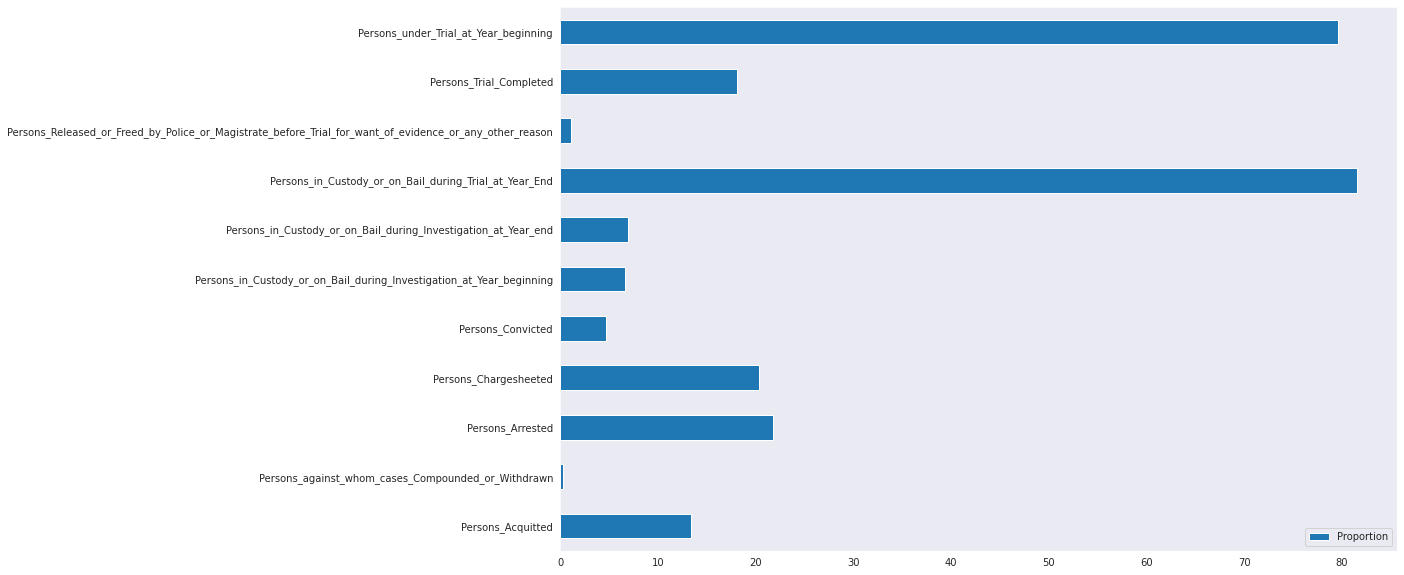

In [88]:
crime_df.plot(kind = 'barh', figsize = (15,10))

When we compare Person under trail at the beginning of a year vs people under trail at the end of the year, we can see that the no of trials are piling year upon year.

Only 18% of the trials were completed.

4.72% of the people were Convicted, while 13% of the people were acquitted.

This statistics tells us that our Police and Justice systems are not working well.


In [93]:
crime_kidnap = crime_women[crime_women["Group_Name"] == "Kidnapping & Abduction - Women & Girls"]
crime_kidnap.head()

,Area_Name,Year,Group_Name,Persons_Acquitted,Persons_against_whom_cases_Compounded_or_Withdrawn,Persons_Arrested,Persons_Chargesheeted,Persons_Convicted,Persons_in_Custody_or_on_Bail_during_Investigation_at_Year_beginning,Persons_in_Custody_or_on_Bail_during_Investigation_at_Year_end,Persons_in_Custody_or_on_Bail_during_Trial_at_Year_End,Persons_Released_or_Freed_by_Police_or_Magistrate_before_Trial_for_want_of_evidence_or_any_other_reason,Persons_Trial_Completed,Persons_under_Trial_at_Year_beginning,Total_Persons_under_Trial
350,Andaman & Nicobar Islands,2001,Kidnapping & Abduction - Women & Girls,2,0,4,5,0,9,8,25,0,2,22,27
351,Andhra Pradesh,2001,Kidnapping & Abduction - Women & Girls,717,71,965,771,82,346,459,1286,81,799,1385,2156
352,Arunachal Pradesh,2001,Kidnapping & Abduction - Women & Girls,5,0,60,56,5,21,17,320,8,10,274,330
353,Assam,2001,Kidnapping & Abduction - Women & Girls,501,58,1583,801,109,1735,1928,2348,589,610,2215,3016
354,Bihar,2001,Kidnapping & Abduction - Women & Girls,614,2,988,933,191,668,572,8547,151,805,8421,9354


In [94]:
crime_kidnap.drop("Group_Name", axis = 1, inplace = True)
crime_kidnap = crime_kidnap.drop(["Area_Name", "Year"], axis = 1).agg(np.sum)
crime_kidnap

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Persons_Acquitted                                                                                           113510
Persons_against_whom_cases_Compounded_or_Withdrawn                                                            5864
Persons_Arrested                                                                                            226868
Persons_Chargesheeted                                                                                       189317
Persons_Convicted                                                                                            42335
Persons_in_Custody_or_on_Bail_during_Investigation_at_Year_beginning                                         87267
Persons_in_Custody_or_on_Bail_during_Investigation_at_Year_end                                               93546
Persons_in_Custody_or_on_Bail_during_Trial_at_Year_End                                                      903895
Persons_Released_or_Freed_by_Police_or_Magistrate_before_Trial_for_want_of_evide

In [95]:
crime_dict = {}
for i in crime_kidnap.index:
  if i == "Total_Persons_under_Trial":
    continue
  else:
    crime_dict[i] = (crime_kidnap[i]/ crime_kidnap["Total_Persons_under_Trial"])*100

crime_df = pd.DataFrame(crime_dict, index = ["Proportion"]).T
crime_df

,Proportion
Persons_Acquitted,10.652175
Persons_against_whom_cases_Compounded_or_Withdrawn,0.550298
Persons_Arrested,21.290085
Persons_Chargesheeted,17.766168
Persons_Convicted,3.972864
Persons_in_Custody_or_on_Bail_during_Investigation_at_Year_beginning,8.189440
Persons_in_Custody_or_on_Bail_during_Investigation_at_Year_end,8.778683
Persons_in_Custody_or_on_Bail_during_Trial_at_Year_End,84.824663
Persons_Released_or_Freed_by_Police_or_Magistrate_before_Trial_for_want_of_evidence_or_any_other_reason,2.934674
Persons_Trial_Completed,14.625039


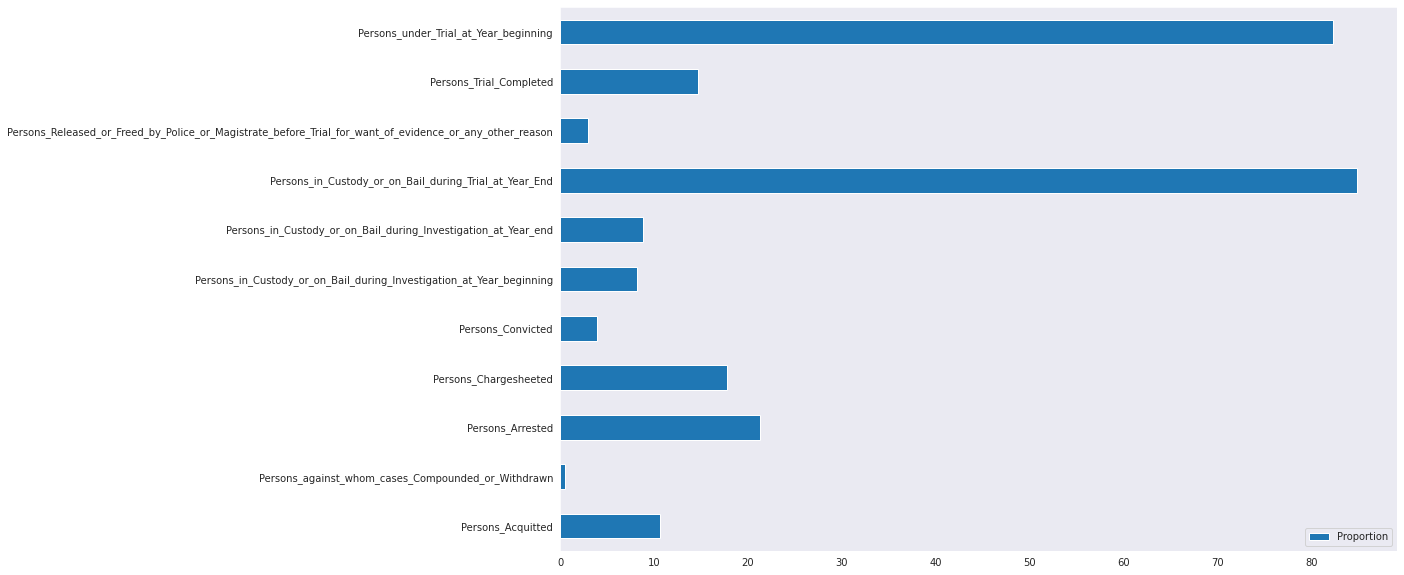

In [96]:
crime_df.plot(kind = 'barh', figsize = (15,10))

Here too we can see the same pattern.

Majority of the cases remain pending in courts

There are very few convictions, less than 5%, while nearly 10% of the offenders have a verdict of not guilty.



Lets see if the pattern repeats in other crime scenarios

# Trail Period

In [102]:
upload5 = files.upload()

Saving upload_trail_period by_court.csv to upload_trail_period by_court.csv


In [106]:
trial_period  = pd.read_csv(io.BytesIO(upload5["upload_trail_period by_court.csv"]))
trial_period

,Area_Name,Year,Group_Name,Sub_Group_Name,PT_1_3_Years,PT_3_5_Years,PT_5_10_Years,PT_6_12_Months,PT_Less_than_6_Months,PT_Over_10_Years,PT_Total
0,Andhra Pradesh,2004,PT1. District/Session Judge,1. District/Session Judge,1931.0,805.0,196.0,293.0,44.0,57.0,3326.0
1,Arunachal Pradesh,2004,PT1. District/Session Judge,1. District/Session Judge,13.0,6.0,0.0,5.0,0.0,0.0,24.0
2,Assam,2004,PT1. District/Session Judge,1. District/Session Judge,582.0,444.0,170.0,127.0,69.0,22.0,1414.0
3,Bihar,2004,PT1. District/Session Judge,1. District/Session Judge,297.0,590.0,594.0,11.0,0.0,233.0,1725.0
4,Chhattisgarh,2004,PT1. District/Session Judge,1. District/Session Judge,239.0,171.0,72.0,222.0,271.0,17.0,992.0
...,...,...,...,...,...,...,...,...,...,...,...
1781,Tamil Nadu,2010,PT8. Total of Courts,8. Total Trials (Sum of 1-7 Above),31670.0,17929.0,6337.0,35894.0,27894.0,854.0,120578.0
1782,Tripura,2010,PT8. Total of Courts,8. Total Trials (Sum of 1-7 Above),969.0,467.0,94.0,512.0,422.0,14.0,2478.0
1783,Uttar Pradesh,2010,PT8. Total of Courts,8. Total Trials (Sum of 1-7 Above),36712.0,52137.0,21241.0,3389.0,599.0,4923.0,119001.0
1784,Uttarakhand,2010,PT8. Total of Courts,8. Total Trials (Sum of 1-7 Above),1932.0,955.0,298.0,1158.0,326.0,52.0,4721.0


In [107]:
trial_period = trial_period[trial_period["Sub_Group_Name"] == "8. Total Trials (Sum of 1-7 Above)"]
trial_period.head()

,Area_Name,Year,Group_Name,Sub_Group_Name,PT_1_3_Years,PT_3_5_Years,PT_5_10_Years,PT_6_12_Months,PT_Less_than_6_Months,PT_Over_10_Years,PT_Total
1541,Andaman & Nicobar Islands,2004,PT8. Total of Courts,8. Total Trials (Sum of 1-7 Above),96.0,41.0,8.0,82.0,66.0,1.0,294.0
1542,Andhra Pradesh,2004,PT8. Total of Courts,8. Total Trials (Sum of 1-7 Above),34745.0,12884.0,2840.0,20398.0,11282.0,388.0,82537.0
1543,Arunachal Pradesh,2004,PT8. Total of Courts,8. Total Trials (Sum of 1-7 Above),235.0,119.0,0.0,83.0,0.0,0.0,437.0
1544,Assam,2004,PT8. Total of Courts,8. Total Trials (Sum of 1-7 Above),7561.0,6858.0,1934.0,1865.0,728.0,324.0,19270.0
1545,Bihar,2004,PT8. Total of Courts,8. Total Trials (Sum of 1-7 Above),10938.0,13335.0,11211.0,1466.0,303.0,3290.0,40543.0


In [108]:
trial_period.drop(["Year", "Area_Name", "Group_Name", "Sub_Group_Name"], axis = 1, inplace = True)


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


PT_1_3_Years             2333314.0
PT_3_5_Years             1650126.0
PT_5_10_Years             829064.0
PT_6_12_Months           1312510.0
PT_Less_than_6_Months     906224.0
PT_Over_10_Years          228557.0
PT_Total                 7259795.0
dtype: float64

In [109]:
trial_period = trial_period.agg(np.sum)

In [110]:
trial_dict = {}
for i in trial_period.index:
  if i == "PT_Total":
    continue
  else:
    trial_dict[i] = (trial_period[i]/trial_period["PT_Total"])*100
trial_df = pd.DataFrame(trial_dict, index = ["Proportion"]).T
trial_df

,Proportion
PT_1_3_Years,32.140219
PT_3_5_Years,22.729650
PT_5_10_Years,11.419937
PT_6_12_Months,18.079161
PT_Less_than_6_Months,12.482777
PT_Over_10_Years,3.148257


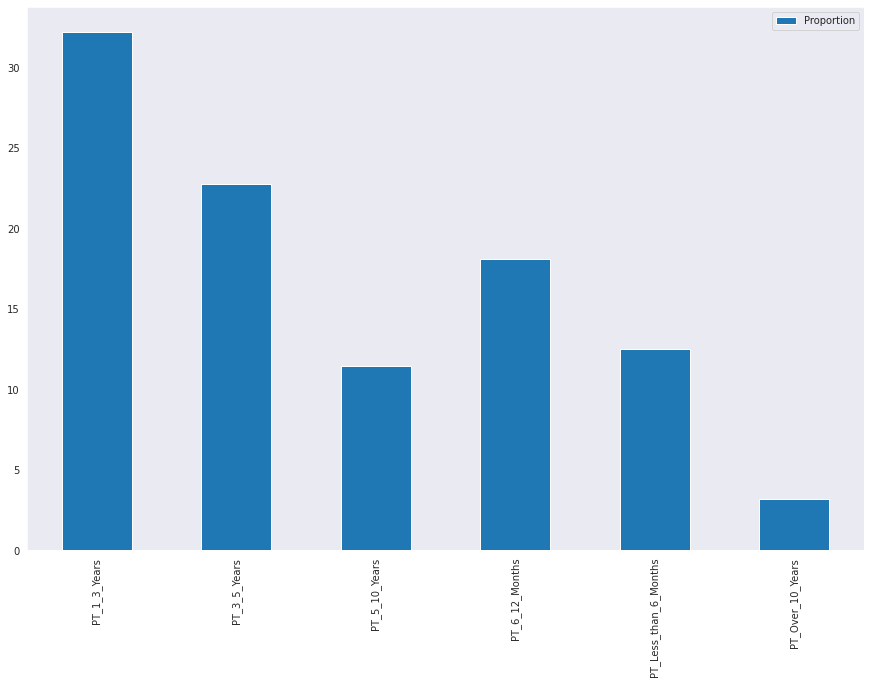

In [112]:
trial_df.plot(kind = 'bar', figsize = (15,10))

So most of the trials take 1-3 years to complete.

There is larger probablity of the trial taking 3-5 years than the trial completing under 6 months or 1 year

Nearly 15% of the cases last more than 5 years

# Machine Learning Model

Lets see if we can build a Machine Learning Model to predict number of Crimes per year in India

In [128]:
yearly.tail()

,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,DACOITY,PREPARATION AND ASSEMBLY FOR DACOITY,ROBBERY,BURGLARY,THEFT,AUTO THEFT,OTHER THEFT,RIOTS,CRIMINAL BREACH OF TRUST,CHEATING,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,ds
7,2008,65532,57196,7726,42934,0,42934,60522,45878,14644,9060,6434,41044,187484,633522,240064,393458,132036,32974,133158,5982,18498,569938,16344,80826,24428,162688,134,184372,1713926,4186758,2008-01-01
8,2009,64738,58076,7860,42794,4,42790,67720,51482,16238,9172,5700,44818,184140,648390,280054,368336,125884,32652,145436,5870,17472,558428,16766,77422,22018,179092,96,197064,1731082,4242690,2009-01-01
9,2010,66670,58842,7564,44344,12,44332,76880,59590,17290,8716,5230,46786,180358,660624,294950,365674,135142,33356,157998,5178,17016,578044,16782,81226,19922,188082,72,212686,1848144,4449662,2010-01-01
10,2011,68610,62770,7414,48412,2,48410,89328,71130,18198,8570,5790,49400,185008,681600,302400,379200,137000,34914,175312,4614,18128,605694,17236,85936,17140,198270,160,217780,1932064,4651150,2011-01-01
11,2012,68868,70276,7240,49846,2,49844,95184,76524,18660,8628,6198,54686,185784,674814,308702,366112,149266,35802,188406,4702,23672,664648,16466,90702,18346,213054,118,215182,1932488,4774376,2012-01-01


In [114]:
yearly["ds"] = pd.to_datetime(yearly["YEAR"], format = '%Y')

In [117]:
from fbprophet import Prophet
# print version number
#print('Prophet %s' % fbprophet.__version__)

In [118]:
input = yearly[["ds", "TOTAL IPC CRIMES"]]
input.columns = ['ds', 'y']
input.head()

,ds,y
0,2001-01-01,3538616
1,2002-01-01,3560660
2,2003-01-01,3432240
3,2004-01-01,3664020
4,2005-01-01,3645204


In [120]:
model = Prophet().fit(input)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 8.


In [125]:
future = model.make_future_dataframe(periods = 10, freq = 'y')        #Predicting what the crime would be for next 10 years
future.tail() 

,ds
17,2017-12-31
18,2018-12-31
19,2019-12-31
20,2020-12-31
21,2021-12-31


In [127]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)

,ds,yhat,yhat_lower,yhat_upper
12,2012-12-31,5.004078e+06,4.961380e+06,5.045491e+06
13,2013-12-31,5.198839e+06,5.134877e+06,5.270346e+06
14,2014-12-31,5.395403e+06,5.293823e+06,5.506207e+06
15,2015-12-31,5.593766e+06,5.435166e+06,5.763998e+06
16,2016-12-31,5.644219e+06,5.413374e+06,5.889945e+06
17,2017-12-31,5.838980e+06,5.528001e+06,6.158129e+06
18,2018-12-31,6.035544e+06,5.634601e+06,6.442123e+06
19,2019-12-31,6.233907e+06,5.726940e+06,6.714629e+06
20,2020-12-31,6.284360e+06,5.670190e+06,6.865365e+06
21,2021-12-31,6.479121e+06,5.763579e+06,7.166993e+06


The model is predicting 6.2 million IPC crimes in year 2020.

It predicted 6.23 million cases in 2019.

But in reality, 3.2 million cases were registered under IPC in 2019.

Source:https://timesofindia.indiatimes.com/india/ncrb-crime-data-2019-cases-registered-up-1-6-crimes-against-women-rise-7-3-cyber-crimes-jump-63-5/articleshow/78394087.cms

SO looking at 2012, the crime rate has dropped in this decade.

Buiding a model for predicting crime in India needs more data. Plus it is dfficult to 'predict' crimes as the crime rate depends on various Geo-political conditions, Economy and the policies of the Govt.